# 1 - Introduction

In this notebook, we implement the Particle Swarm Optimization (PSO) algorithm to solve an optimization problem. PSO is a nature-inspired metaheuristic optimization algorithm that is widely used to find the optimal solution in a search space.

#2 - Setup and Imports


### 2.1 - import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.2 - Define problem parameters

In [2]:
lower_bound = -5  # Lower bound of the search space.
upper_bound = 5   # Upper bound of the search space.

num_particles = 5     # Number of particles.
inertia_weight = 0.7  # Inertia weight parameter.

c1 = 1.5  # The learning rate for personal best.
c2 = 1.5  # The learning rate for neighborhood best.


num_iterations = 100     # Number of iterations.
threshold_fitness = 0.01  # Threshold fitness value.

# 3 - Optimization Function Definition


In [3]:
def optimization_function(x1, x2, x3, x4):
    """
    Fitness function to be optimized.

    Parameters:
    x1 (float): Value of the first parameter.
    x2 (float): Value of the second parameter.
    x3 (float): Value of the third parameter.
    x4 (float): Value of the fourth parameter.

    Returns:
    float: Fitness value calculated based on the input parameters.
    """
    return x1**2 + x2**2 + x3**2 + x4**2

#4 - Plotting Function


In [4]:
def scatter_plot_population(func, position, lower_bound, upper_bound):
    """Plot the fitness function with population."""

    # Generate x values
    x = np.linspace(lower_bound, upper_bound, 100)

    # Plot the fitness function
    plt.plot(x, func(x, x, x, x), label='Fitness Function')

    # Scatter plot the population
    plt.scatter(position[:, 0], position[:, 1], color='red', label='Population')

    # Set labels and title
    plt.ylabel('Fitness Value')
    plt.title('Fitness Function with Population')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()

    # Print a separator line for better visual separation
    print("=" * 170)

*Note that: in this practical scenario, Particles are represented as [x, y, z, h, u], we focus on the first two dimensions (x,y) for visualization*

#5 - PSO Utility Functions


### 5.1 - Initialization Function

In [5]:
def initialize_pso(lower_bound, upper_bound, num_particles):

    # Initialize positions randomly within the search space
    position = np.random.uniform(lower_bound, upper_bound, (num_particles, 4))
    # Initialize velocities randomly
    velocities = np.random.uniform(-1, 1, (num_particles, 4))

    # Initialize personal best positions as current positions
    personal_best = position.copy()
    # Find global best position using current positions
    global_best = find_global_best(position)

    # Return initialized parameters
    return position, velocities, personal_best, global_best

### 5.2 - Personal Best Function

In [6]:
def find_personal_best(position, personal_best):
    """Update personal best for each particle."""
    # Calculate fitness for current position and personal best
    current_fitness = np.array([optimization_function(*particle) for particle in position])
    personal_fitness = np.array([optimization_function(*particle) for particle in personal_best])

    # Update personal best where fitness improves
    better_indices = current_fitness < personal_fitness
    personal_best[better_indices] = position[better_indices]

    return personal_best

### 5.3 - Global Best Function

In [7]:
def find_global_best(position):
    """Find the global best position among all particles."""
    # Calculate fitness values for all particles
    fitness_values = np.array([optimization_function(*particle) for particle in position])

    # Find index of the particle with the lowest fitness
    global_best_index = np.argmin(fitness_values)

    # Return the position of the particle with the lowest fitness
    return position[global_best_index]

### 5.4 - Iteration Function


In [8]:
def run_pso_iteration(position, velocities, personal_best, global_best, inertia_weight, c1, c2, lower_bound, upper_bound):
    """Run one iteration of PSO algorithm."""
    # Update velocities
    r1 = np.random.random(position.shape)
    r2 = np.random.random(position.shape)

    # Stage 1: Update particles' velocities using the PSO formula
    velocities = inertia_weight * velocities + c1 * r1 * (personal_best - position) + c2 * r2 * (global_best - position)

    # Stage 2: Update particles' positions
    position += velocities

    # Apply boundary checks to ensure positions stay within bounds
    position = np.clip(position, lower_bound, upper_bound)

    # Update personal best
    personal_best = find_personal_best(position, personal_best)
    # Update global best
    global_best = find_global_best(position)

    return position, velocities, personal_best, global_best

### 5.5 - Population points

In [9]:
def print_data(position, velocities, global_best, global_best_score, personal_best):

    for i, (particle_pos, particle_vel, particle_best) in enumerate(zip(position, velocities, personal_best)):
        fitness_value = optimization_function(*particle_pos)
        rounded_pos = np.round(particle_pos, 2)
        rounded_vel = np.round(particle_vel, 2)
        rounded_best = np.round(particle_best, 2)
        print(f"Particle {i+1}: [Position: {rounded_pos}\t Velocity: {rounded_vel}\t Fitness: {fitness_value:.2f}\t\t Personal Best: {rounded_best}]")

    print('\n')
    rounded_global_best = np.round(global_best, 2)
    print(f"Global Best Value: {rounded_global_best} \t\t Score: {global_best_score:.2f}")
    print('\n')

#6 - Main Function


In [10]:
def main():
    """Main function to run PSO algorithm."""
    # Initialize PSO parameters and population
    position, velocities, personal_best, global_best = initialize_pso(lower_bound, upper_bound, num_particles)

    # Iterate through PSO algorithm
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}:")
        print('-'*15)

        # Calculate global best score and print data
        global_best_score = optimization_function(global_best[0], global_best[1], global_best[2], global_best[3])
        print_data(position, velocities, global_best, global_best_score, personal_best)

        # Plot population distribution
        scatter_plot_population(optimization_function, position, lower_bound, upper_bound)

        # Run PSO iteration
        position, velocities, personal_best, global_best = run_pso_iteration(
            position, velocities, personal_best, global_best, inertia_weight, c1, c2, lower_bound, upper_bound)

        # Check if the global best score meets the threshold
        if global_best_score <= threshold_fitness:
          print("[$] Mission accomplished! Threshold fitness value reached 🎉🚀")
          break

Iteration 1:
---------------
Particle 1: [Position: [ 1.58  1.09 -4.71 -4.12]	 Velocity: [-0.83 -0.79 -0.18 -0.11]	 Fitness: 42.87		 Personal Best: [ 1.58  1.09 -4.71 -4.12]]
Particle 2: [Position: [-4.98  4.3  -0.56 -3.58]	 Velocity: [ 0.68  0.24 -0.81  0.47]	 Fitness: 56.42		 Personal Best: [-4.98  4.3  -0.56 -3.58]]
Particle 3: [Position: [ 4.47  2.62  1.81 -2.88]	 Velocity: [-0.75 -0.17 -0.38  0.4 ]	 Fitness: 38.42		 Personal Best: [ 4.47  2.62  1.81 -2.88]]
Particle 4: [Position: [ 4.8   2.85  3.25 -4.15]	 Velocity: [0.84 0.12 0.06 0.22]	 Fitness: 58.97		 Personal Best: [ 4.8   2.85  3.25 -4.15]]
Particle 5: [Position: [ 3.28 -4.7   4.37 -2.56]	 Velocity: [-0.59  0.55  0.87 -0.94]	 Fitness: 58.58		 Personal Best: [ 3.28 -4.7   4.37 -2.56]]


Global Best Value: [ 4.47  2.62  1.81 -2.88] 		 Score: 38.42




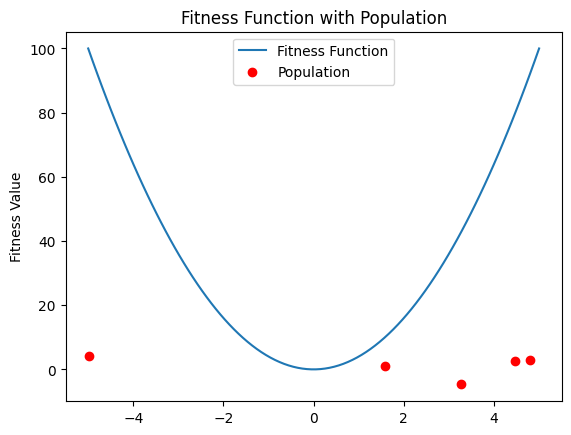

Iteration 2:
---------------
Particle 1: [Position: [ 5.    2.56 -4.14 -2.9 ]	 Velocity: [3.55 1.47 0.57 1.22]	 Fitness: 57.13		 Personal Best: [ 1.58  1.09 -4.71 -4.12]]
Particle 2: [Position: [-2.09  2.87  2.39 -2.82]	 Velocity: [ 2.89 -1.43  2.95  0.77]	 Fitness: 26.25		 Personal Best: [-2.09  2.87  2.39 -2.82]]
Particle 3: [Position: [ 3.94  2.5   1.54 -2.6 ]	 Velocity: [-0.53 -0.12 -0.27  0.28]	 Fitness: 30.96		 Personal Best: [ 3.94  2.5   1.54 -2.6 ]]
Particle 4: [Position: [ 5.    2.9   2.35 -2.39]	 Velocity: [ 0.57  0.05 -0.91  1.76]	 Fitness: 44.60		 Personal Best: [ 5.    2.9   2.35 -2.39]]
Particle 5: [Position: [ 3.01  2.99  1.67 -3.62]	 Velocity: [-0.27  7.69 -2.7  -1.05]	 Fitness: 33.88		 Personal Best: [ 3.01  2.99  1.67 -3.62]]


Global Best Value: [-2.09  2.87  2.39 -2.82] 		 Score: 26.25




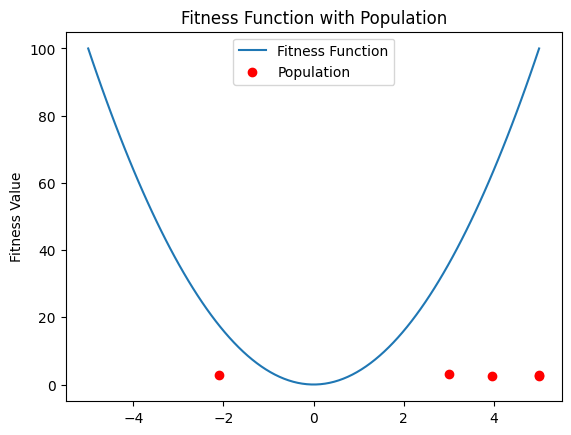

Iteration 3:
---------------
Particle 1: [Position: [-3.23  1.57  2.62 -3.14]	 Velocity: [-8.23 -0.99  6.76 -0.24]	 Fitness: 29.65		 Personal Best: [-3.23  1.57  2.62 -3.14]]
Particle 2: [Position: [-0.07  1.87  4.45 -2.28]	 Velocity: [ 2.02 -1.    2.06  0.54]	 Fitness: 28.50		 Personal Best: [-2.09  2.87  2.39 -2.82]]
Particle 3: [Position: [-3.87  2.68  2.02 -2.61]	 Velocity: [-7.81  0.17  0.48 -0.01]	 Fitness: 33.01		 Personal Best: [ 3.94  2.5   1.54 -2.6 ]]
Particle 4: [Position: [-1.9   2.93  1.73 -1.37]	 Velocity: [-6.9   0.03 -0.61  1.02]	 Fitness: 17.06		 Personal Best: [-1.9   2.93  1.73 -1.37]]
Particle 5: [Position: [-3.55  5.    0.07 -3.91]	 Velocity: [-6.56  5.21 -1.61 -0.3 ]	 Fitness: 52.92		 Personal Best: [ 3.01  2.99  1.67 -3.62]]


Global Best Value: [-1.9   2.93  1.73 -1.37] 		 Score: 17.06




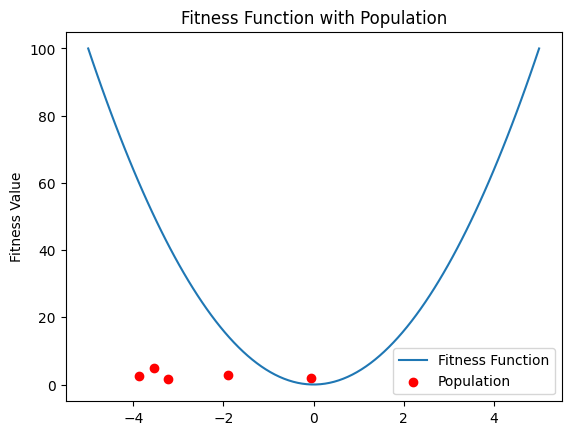

Iteration 4:
---------------
Particle 1: [Position: [-5.    1.2   5.   -2.11]	 Velocity: [-4.27 -0.38  3.9   1.03]	 Fitness: 55.88		 Personal Best: [-3.23  1.57  2.62 -3.14]]
Particle 2: [Position: [-2.54  2.37  0.65 -0.98]	 Velocity: [-2.47  0.5  -3.8   1.3 ]	 Fitness: 13.41		 Personal Best: [-2.54  2.37  0.65 -0.98]]
Particle 3: [Position: [-5.    2.71  1.43 -2.5 ]	 Velocity: [-2.36  0.04 -0.6   0.1 ]	 Fitness: 40.66		 Personal Best: [ 3.94  2.5   1.54 -2.6 ]]
Particle 4: [Position: [-5.    2.94  1.31 -0.66]	 Velocity: [-4.83  0.02 -0.43  0.71]	 Fitness: 35.81		 Personal Best: [-1.9   2.93  1.73 -1.37]]
Particle 5: [Position: [-3.25  4.69  2.43 -1.94]	 Velocity: [ 0.3  -0.31  2.37  1.97]	 Fitness: 42.19		 Personal Best: [ 3.01  2.99  1.67 -3.62]]


Global Best Value: [-2.54  2.37  0.65 -0.98] 		 Score: 13.41




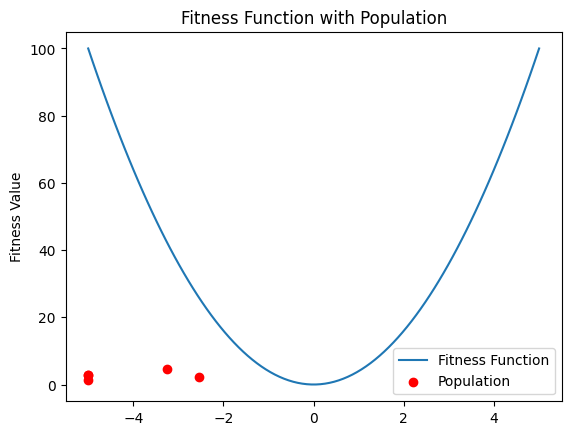

Iteration 5:
---------------
Particle 1: [Position: [-3.65  3.09  2.95 -1.57]	 Velocity: [ 1.35  1.9  -2.05  0.54]	 Fitness: 34.10		 Personal Best: [-3.23  1.57  2.62 -3.14]]
Particle 2: [Position: [-4.26  2.72 -2.01 -0.06]	 Velocity: [-1.73  0.35 -2.66  0.91]	 Fitness: 29.60		 Personal Best: [-2.54  2.37  0.65 -0.98]]
Particle 3: [Position: [-2.67  2.45  0.61 -0.97]	 Velocity: [ 2.33 -0.26 -0.82  1.53]	 Fitness: 14.43		 Personal Best: [-2.67  2.45  0.61 -0.97]]
Particle 4: [Position: [-2.96  2.14  1.07 -1.16]	 Velocity: [ 2.04 -0.81 -0.24 -0.5 ]	 Fitness: 15.84		 Personal Best: [-2.96  2.14  1.07 -1.16]]
Particle 5: [Position: [ 5.    0.8   0.7  -0.31]	 Velocity: [ 9.12 -3.89 -1.74  1.63]	 Fitness: 26.21		 Personal Best: [ 5.    0.8   0.7  -0.31]]


Global Best Value: [-2.67  2.45  0.61 -0.97] 		 Score: 14.43




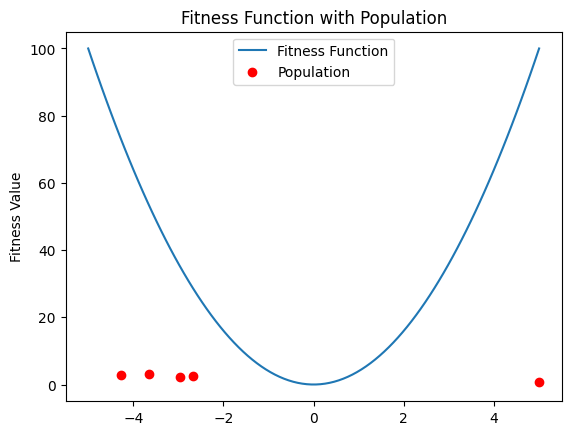

Iteration 6:
---------------
Particle 1: [Position: [-1.12  4.3   0.69 -3.45]	 Velocity: [ 2.54  1.21 -2.26 -1.88]	 Fitness: 32.15		 Personal Best: [-3.23  1.57  2.62 -3.14]]
Particle 2: [Position: [-1.98  2.56 -2.87 -1.23]	 Velocity: [ 2.29 -0.16 -0.86 -1.16]	 Fitness: 20.20		 Personal Best: [-2.54  2.37  0.65 -0.98]]
Particle 3: [Position: [-1.04  2.27  0.03  0.1 ]	 Velocity: [ 1.63 -0.18 -0.57  1.07]	 Fitness: 6.23		 Personal Best: [-1.04  2.27  0.03  0.1 ]]
Particle 4: [Position: [-1.43  2.03  0.69 -1.27]	 Velocity: [ 1.54 -0.1  -0.38 -0.11]	 Fitness: 8.26		 Personal Best: [-1.43  2.03  0.69 -1.27]]
Particle 5: [Position: [ 5.   -0.55 -0.59  0.02]	 Velocity: [ 3.93 -1.35 -1.29  0.33]	 Fitness: 25.65		 Personal Best: [ 5.   -0.55 -0.59  0.02]]


Global Best Value: [-1.04  2.27  0.03  0.1 ] 		 Score: 6.23




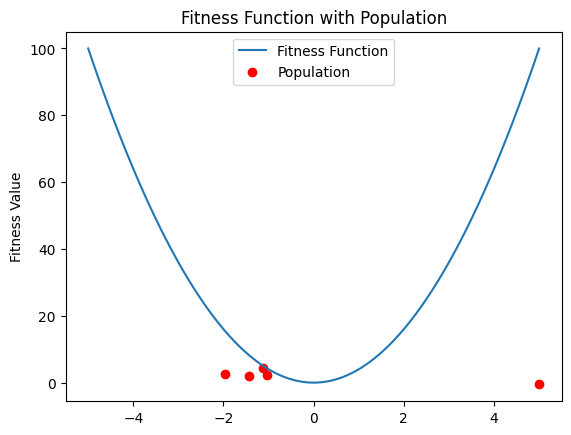

Iteration 7:
---------------
Particle 1: [Position: [-1.33  2.86  1.01 -4.44]	 Velocity: [-0.22 -1.44  0.32 -0.99]	 Fitness: 30.67		 Personal Best: [-3.23  1.57  2.62 -3.14]]
Particle 2: [Position: [ 0.7   2.27  2.08 -1.44]	 Velocity: [ 2.68 -0.29  4.95 -0.21]	 Fitness: 12.02		 Personal Best: [ 0.7   2.27  2.08 -1.44]]
Particle 3: [Position: [ 0.1   2.14 -0.37  0.86]	 Velocity: [ 1.14 -0.13 -0.4   0.75]	 Fitness: 5.46		 Personal Best: [ 0.1   2.14 -0.37  0.86]]
Particle 4: [Position: [-0.11  2.06 -0.29  0.53]	 Velocity: [ 1.32  0.03 -0.98  1.8 ]	 Fitness: 4.64		 Personal Best: [-0.11  2.06 -0.29  0.53]]
Particle 5: [Position: [ 5.    1.55 -1.02  0.36]	 Velocity: [ 2.16  2.1  -0.43  0.33]	 Fitness: 28.59		 Personal Best: [ 5.   -0.55 -0.59  0.02]]


Global Best Value: [-0.11  2.06 -0.29  0.53] 		 Score: 4.64




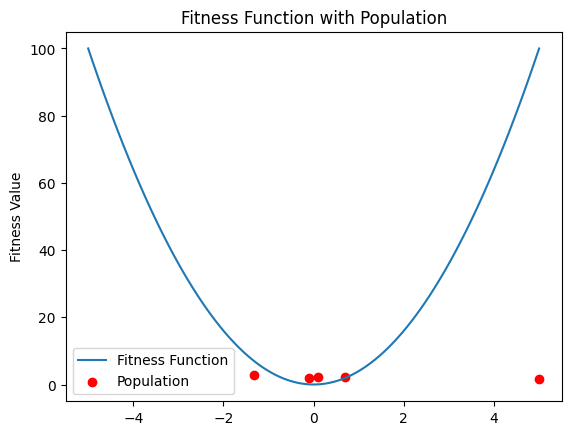

Iteration 8:
---------------
Particle 1: [Position: [-3.    0.61  3.15  2.31]	 Velocity: [-1.66 -2.25  2.13  6.75]	 Fitness: 24.61		 Personal Best: [-3.    0.61  3.15  2.31]]
Particle 2: [Position: [ 2.56  1.91  3.35 -0.96]	 Velocity: [ 1.87 -0.36  1.27  0.48]	 Fitness: 22.34		 Personal Best: [ 0.7   2.27  2.08 -1.44]]
Particle 3: [Position: [ 0.8   2.   -0.59  1.01]	 Velocity: [ 0.69 -0.14 -0.22  0.15]	 Fitness: 5.98		 Personal Best: [ 0.1   2.14 -0.37  0.86]]
Particle 4: [Position: [ 0.81  2.09 -0.98  1.79]	 Velocity: [ 0.92  0.02 -0.68  1.26]	 Fitness: 9.16		 Personal Best: [-0.11  2.06 -0.29  0.53]]
Particle 5: [Position: [-0.08  1.72 -1.04  0.38]	 Velocity: [-5.08  0.17 -0.01  0.02]	 Fitness: 4.19		 Personal Best: [-0.08  1.72 -1.04  0.38]]


Global Best Value: [-0.08  1.72 -1.04  0.38] 		 Score: 4.19




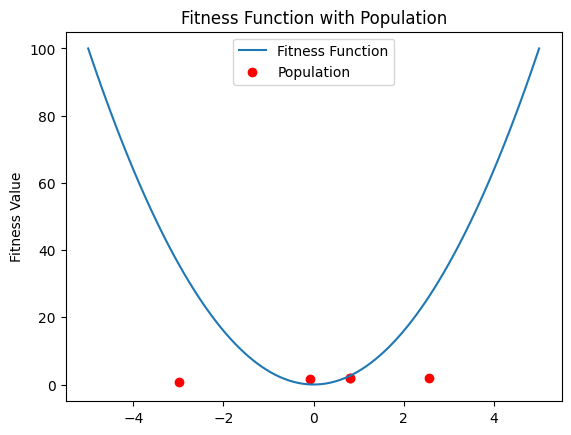

Iteration 9:
---------------
Particle 1: [Position: [-2.51  0.14  3.5   4.88]	 Velocity: [ 0.49 -0.47  0.35  2.57]	 Fitness: 42.43		 Personal Best: [-3.    0.61  3.15  2.31]]
Particle 2: [Position: [ 0.06  1.96 -1.38  0.54]	 Velocity: [-2.5   0.05 -4.72  1.5 ]	 Fitness: 6.02		 Personal Best: [ 0.06  1.96 -1.38  0.54]]
Particle 3: [Position: [-0.21  1.71 -0.95  0.53]	 Velocity: [-1.01 -0.28 -0.36 -0.48]	 Fitness: 4.16		 Personal Best: [-0.21  1.71 -0.95  0.53]]
Particle 4: [Position: [ 0.09  1.8  -1.46  0.87]	 Velocity: [-0.73 -0.29 -0.48 -0.92]	 Fitness: 6.12		 Personal Best: [-0.11  2.06 -0.29  0.53]]
Particle 5: [Position: [-3.63  1.84 -1.05  0.4 ]	 Velocity: [-3.55  0.12 -0.01  0.02]	 Fitness: 17.84		 Personal Best: [-0.08  1.72 -1.04  0.38]]


Global Best Value: [-0.21  1.71 -0.95  0.53] 		 Score: 4.16




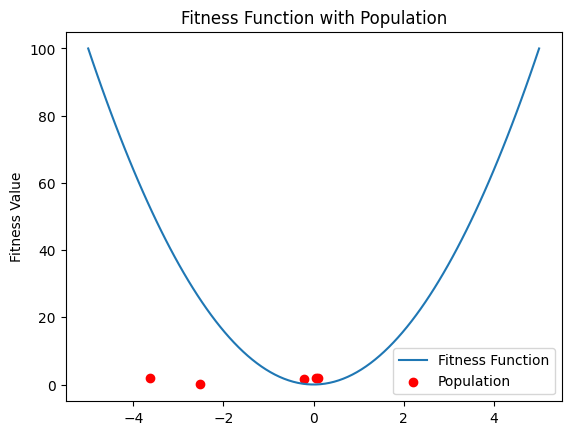

Iteration 10:
---------------
Particle 1: [Position: [-0.9   2.5  -0.61  1.77]	 Velocity: [ 1.61  2.36 -4.11 -3.11]	 Fitness: 10.57		 Personal Best: [-0.9   2.5  -0.61  1.77]]
Particle 2: [Position: [-1.79  1.64 -4.68  1.58]	 Velocity: [-1.85 -0.31 -3.3   1.04]	 Fitness: 30.31		 Personal Best: [ 0.06  1.96 -1.38  0.54]]
Particle 3: [Position: [-0.92  1.52 -1.2   0.19]	 Velocity: [-0.71 -0.2  -0.25 -0.34]	 Fitness: 4.61		 Personal Best: [-0.21  1.71 -0.95  0.53]]
Particle 4: [Position: [-0.77  1.9  -1.22  0.11]	 Velocity: [-0.86  0.1   0.23 -0.76]	 Fitness: 5.71		 Personal Best: [-0.11  2.06 -0.29  0.53]]
Particle 5: [Position: [ 2.45  1.75 -0.9   0.52]	 Velocity: [ 6.09 -0.09  0.14  0.13]	 Fitness: 10.16		 Personal Best: [-0.08  1.72 -1.04  0.38]]


Global Best Value: [-0.92  1.52 -1.2   0.19] 		 Score: 4.61




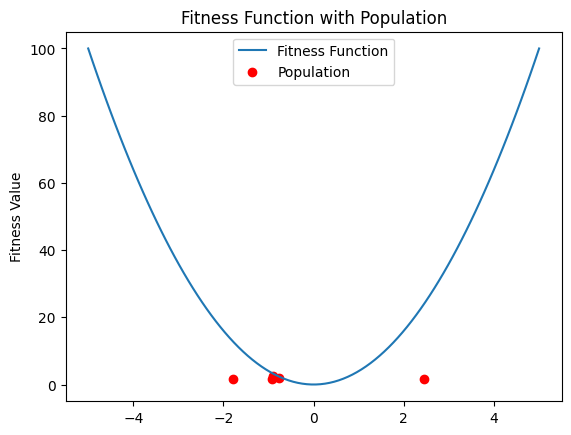

Iteration 11:
---------------
Particle 1: [Position: [ 0.21  3.15 -3.85 -1.26]	 Velocity: [ 1.11  0.65 -3.24 -3.03]	 Fitness: 26.38		 Personal Best: [-0.9   2.5  -0.61  1.77]]
Particle 2: [Position: [-1.44  1.28 -1.78  1.16]	 Velocity: [ 0.34 -0.36  2.9  -0.42]	 Fitness: 8.23		 Personal Best: [ 0.06  1.96 -1.38  0.54]]
Particle 3: [Position: [-1.15  1.41 -1.33  0.18]	 Velocity: [-0.23 -0.11 -0.13 -0.01]	 Fitness: 5.10		 Personal Best: [-0.21  1.71 -0.95  0.53]]
Particle 4: [Position: [-0.49  1.98 -0.13  0.01]	 Velocity: [ 0.28  0.08  1.09 -0.1 ]	 Fitness: 4.17		 Personal Best: [-0.49  1.98 -0.13  0.01]]
Particle 5: [Position: [ 1.32  1.52 -1.26  0.24]	 Velocity: [-1.13 -0.23 -0.36 -0.28]	 Fitness: 5.70		 Personal Best: [-0.08  1.72 -1.04  0.38]]


Global Best Value: [-0.49  1.98 -0.13  0.01] 		 Score: 4.17




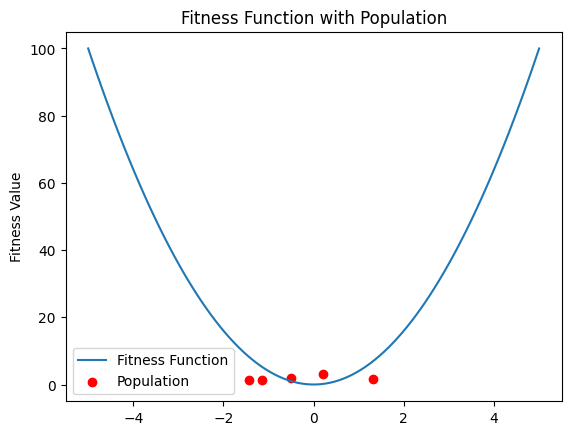

Iteration 12:
---------------
Particle 1: [Position: [-1.43  1.94 -3.78 -1.94]	 Velocity: [-1.64 -1.2   0.07 -0.68]	 Fitness: 23.86		 Personal Best: [-0.9   2.5  -0.61  1.77]]
Particle 2: [Position: [1.08 2.34 1.15 0.52]	 Velocity: [ 2.52  1.06  2.93 -0.65]	 Fitness: 8.25		 Personal Best: [ 0.06  1.96 -1.38  0.54]]
Particle 3: [Position: [ 0.77  1.88 -0.01  0.33]	 Velocity: [1.92 0.47 1.32 0.15]	 Fitness: 4.24		 Personal Best: [-0.21  1.71 -0.95  0.53]]
Particle 4: [Position: [-0.3   2.03  0.64 -0.06]	 Velocity: [ 0.19  0.06  0.77 -0.07]	 Fitness: 4.62		 Personal Best: [-0.49  1.98 -0.13  0.01]]
Particle 5: [Position: [-1.73  2.07 -0.55 -0.04]	 Velocity: [-3.06  0.55  0.71 -0.28]	 Fitness: 7.60		 Personal Best: [-0.08  1.72 -1.04  0.38]]


Global Best Value: [ 0.77  1.88 -0.01  0.33] 		 Score: 4.24




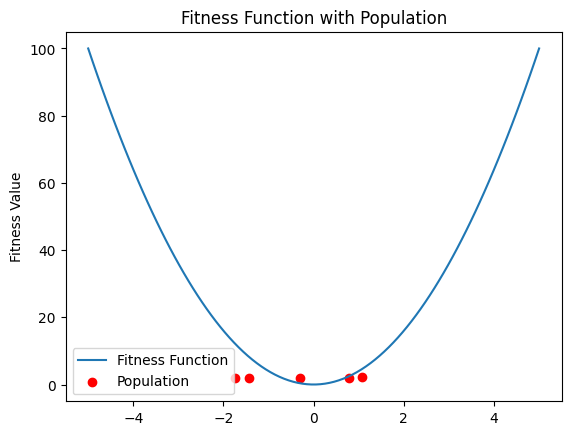

Iteration 13:
---------------
Particle 1: [Position: [-1.52  1.09 -0.5   4.  ]	 Velocity: [-0.1  -0.85  3.27  5.94]	 Fitness: 19.76		 Personal Best: [-0.9   2.5  -0.61  1.77]]
Particle 2: [Position: [ 2.58  2.12 -0.9  -0.18]	 Velocity: [ 1.5  -0.22 -2.05 -0.69]	 Fitness: 11.98		 Personal Best: [ 0.06  1.96 -1.38  0.54]]
Particle 3: [Position: [ 0.96  2.13 -0.38  0.48]	 Velocity: [ 0.19  0.25 -0.38  0.15]	 Fitness: 5.84		 Personal Best: [-0.21  1.71 -0.95  0.53]]
Particle 4: [Position: [ 0.14  1.82 -0.87  0.29]	 Velocity: [ 0.44 -0.21 -1.51  0.35]	 Fitness: 4.18		 Personal Best: [-0.49  1.98 -0.13  0.01]]
Particle 5: [Position: [-2.04  2.27  0.36  0.23]	 Velocity: [-0.31  0.2   0.91  0.27]	 Fitness: 9.52		 Personal Best: [-0.08  1.72 -1.04  0.38]]


Global Best Value: [ 0.14  1.82 -0.87  0.29] 		 Score: 4.18




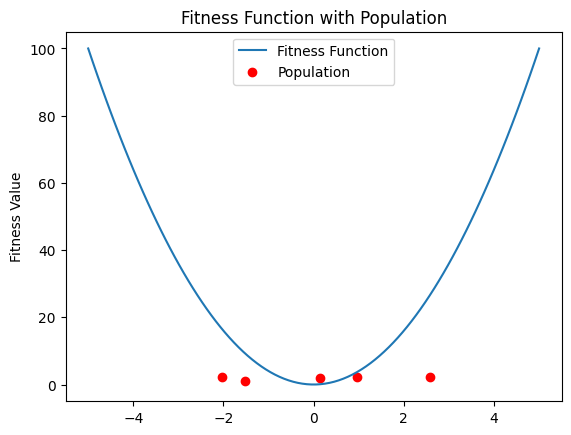

Iteration 14:
---------------
Particle 1: [Position: [-1.02  2.32  1.66  1.67]	 Velocity: [ 0.51  1.23  2.17 -2.33]	 Fitness: 11.99		 Personal Best: [-0.9   2.5  -0.61  1.77]]
Particle 2: [Position: [-1.25  1.39 -2.98 -0.17]	 Velocity: [-3.83 -0.73 -2.08  0.01]	 Fitness: 12.40		 Personal Best: [ 0.06  1.96 -1.38  0.54]]
Particle 3: [Position: [-0.96  2.03 -1.53  0.59]	 Velocity: [-1.93 -0.11 -1.15  0.11]	 Fitness: 7.72		 Personal Best: [-0.21  1.71 -0.95  0.53]]
Particle 4: [Position: [-0.27  1.9  -0.99  0.41]	 Velocity: [-0.41  0.08 -0.12  0.12]	 Fitness: 4.84		 Personal Best: [-0.49  1.98 -0.13  0.01]]
Particle 5: [Position: [ 1.95  0.96 -1.6   0.55]	 Velocity: [ 3.99 -1.32 -1.97  0.32]	 Fitness: 7.58		 Personal Best: [-0.08  1.72 -1.04  0.38]]


Global Best Value: [-0.27  1.9  -0.99  0.41] 		 Score: 4.84




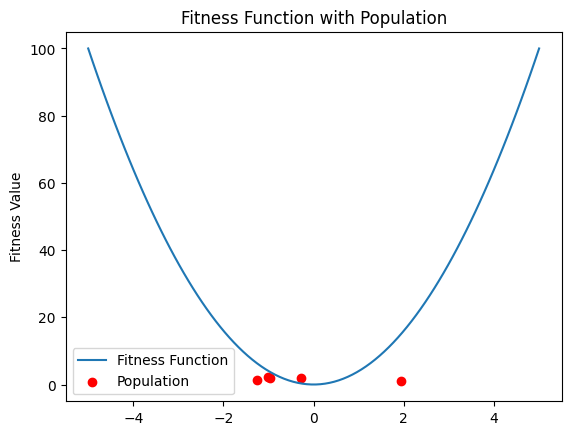

Iteration 15:
---------------
Particle 1: [Position: [ 0.03  3.08 -0.9  -0.17]	 Velocity: [ 1.05  0.76 -2.57 -1.85]	 Fitness: 10.32		 Personal Best: [ 0.03  3.08 -0.9  -0.17]]
Particle 2: [Position: [-3.64  1.61 -2.68  0.18]	 Velocity: [-2.38  0.22  0.29  0.35]	 Fitness: 23.03		 Personal Best: [ 0.06  1.96 -1.38  0.54]]
Particle 3: [Position: [-1.16  1.52 -1.29  0.43]	 Velocity: [-0.2  -0.51  0.24 -0.16]	 Fitness: 5.51		 Personal Best: [-0.21  1.71 -0.95  0.53]]
Particle 4: [Position: [-0.83  1.96 -0.01  0.14]	 Velocity: [-0.56  0.06  0.98 -0.27]	 Fitness: 4.55		 Personal Best: [-0.49  1.98 -0.13  0.01]]
Particle 5: [Position: [ 1.2   0.47 -1.63  0.47]	 Velocity: [-0.74 -0.49 -0.03 -0.08]	 Fitness: 4.55		 Personal Best: [-0.08  1.72 -1.04  0.38]]


Global Best Value: [-0.83  1.96 -0.01  0.14] 		 Score: 4.55




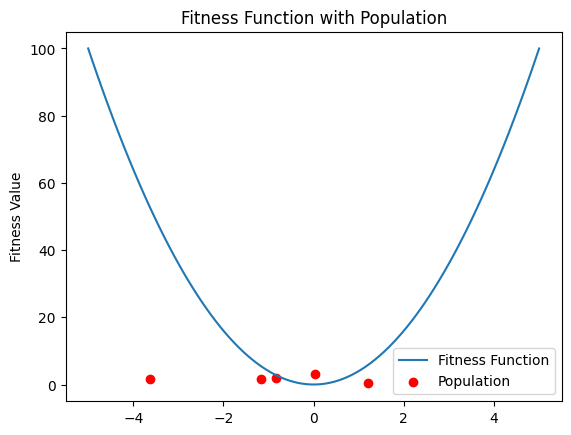

Iteration 16:
---------------
Particle 1: [Position: [-0.    3.36 -1.93 -1.36]	 Velocity: [-0.04  0.29 -1.03 -1.18]	 Fitness: 16.89		 Personal Best: [ 0.03  3.08 -0.9  -0.17]]
Particle 2: [Position: [-2.9   2.12 -0.94  0.68]	 Velocity: [0.73 0.51 1.75 0.5 ]	 Fitness: 14.26		 Personal Best: [ 0.06  1.96 -1.38  0.54]]
Particle 3: [Position: [-0.83  1.28 -0.1   0.08]	 Velocity: [ 0.33 -0.24  1.19 -0.35]	 Fitness: 2.35		 Personal Best: [-0.83  1.28 -0.1   0.08]]
Particle 4: [Position: [-1.03  2.01  0.67 -0.16]	 Velocity: [-0.2   0.06  0.68 -0.3 ]	 Fitness: 5.60		 Personal Best: [-0.49  1.98 -0.13  0.01]]
Particle 5: [Position: [-2.9   2.02  0.38  0.26]	 Velocity: [-4.1   1.55  2.01 -0.21]	 Fitness: 12.68		 Personal Best: [-0.08  1.72 -1.04  0.38]]


Global Best Value: [-0.83  1.28 -0.1   0.08] 		 Score: 2.35




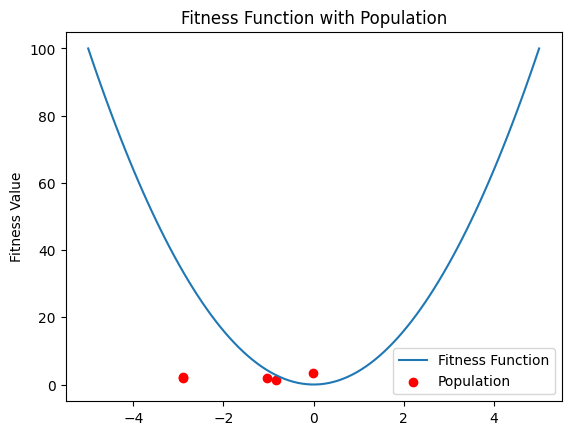

Iteration 17:
---------------
Particle 1: [Position: [-1.19  0.56  0.99  1.38]	 Velocity: [-1.18 -2.81  2.93  2.73]	 Fitness: 4.61		 Personal Best: [-1.19  0.56  0.99  1.38]]
Particle 2: [Position: [1.37 1.41 1.03 0.56]	 Velocity: [ 4.27 -0.71  1.97 -0.12]	 Fitness: 5.24		 Personal Best: [1.37 1.41 1.03 0.56]]
Particle 3: [Position: [-0.6   1.11  0.73 -0.17]	 Velocity: [ 0.23 -0.17  0.83 -0.25]	 Fitness: 2.15		 Personal Best: [-0.6   1.11  0.73 -0.17]]
Particle 4: [Position: [-0.37  1.73 -0.62 -0.17]	 Velocity: [ 0.67 -0.29 -1.29 -0.  ]	 Fitness: 3.54		 Personal Best: [-0.37  1.73 -0.62 -0.17]]
Particle 5: [Position: [-2.2   2.52 -0.92  0.02]	 Velocity: [ 0.69  0.5  -1.3  -0.25]	 Fitness: 12.04		 Personal Best: [-0.08  1.72 -1.04  0.38]]


Global Best Value: [-0.6   1.11  0.73 -0.17] 		 Score: 2.15




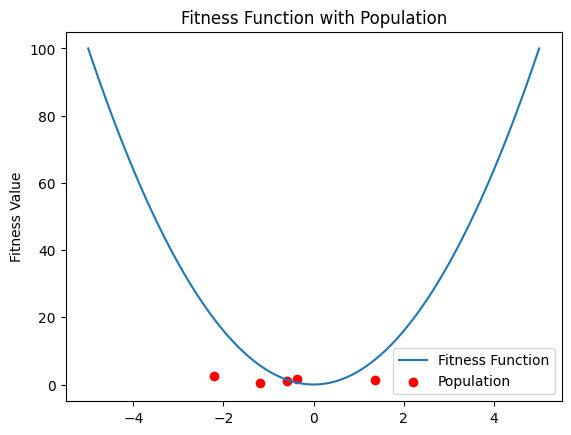

Iteration 18:
---------------
Particle 1: [Position: [-1.49 -0.92  2.77  1.73]	 Velocity: [-0.3  -1.48  1.78  0.35]	 Fitness: 13.75		 Personal Best: [-1.19  0.56  0.99  1.38]]
Particle 2: [Position: [2.06 0.64 2.02 0.29]	 Velocity: [ 0.69 -0.77  0.98 -0.27]	 Fitness: 8.78		 Personal Best: [1.37 1.41 1.03 0.56]]
Particle 3: [Position: [-0.43  1.    1.31 -0.34]	 Velocity: [ 0.16 -0.12  0.58 -0.17]	 Fitness: 3.01		 Personal Best: [-0.6   1.11  0.73 -0.17]]
Particle 4: [Position: [-0.19  0.77  0.2  -0.17]	 Velocity: [ 0.18 -0.96  0.82 -0.01]	 Fitness: 0.70		 Personal Best: [-0.19  0.77  0.2  -0.17]]
Particle 5: [Position: [ 1.41  1.84 -0.06  0.12]	 Velocity: [ 3.61 -0.68  0.86  0.1 ]	 Fitness: 5.39		 Personal Best: [-0.08  1.72 -1.04  0.38]]


Global Best Value: [-0.19  0.77  0.2  -0.17] 		 Score: 0.70




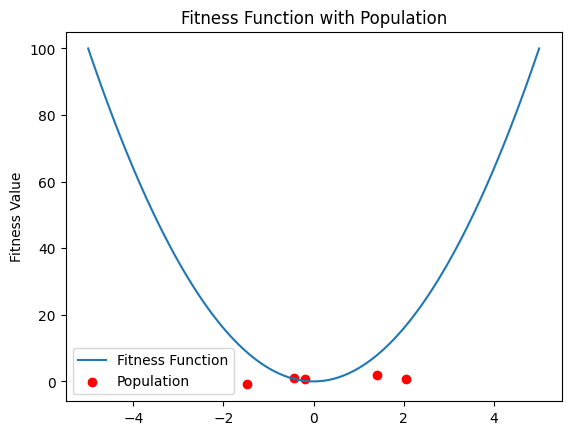

Iteration 19:
---------------
Particle 1: [Position: [-1.28  1.16  2.51 -0.7 ]	 Velocity: [ 0.21  2.08 -0.26 -2.43]	 Fitness: 9.79		 Personal Best: [-1.19  0.56  0.99  1.38]]
Particle 2: [Position: [-1.06  0.94  1.02  0.03]	 Velocity: [-3.11  0.31 -1.   -0.27]	 Fitness: 3.04		 Personal Best: [-1.06  0.94  1.02  0.03]]
Particle 3: [Position: [-0.3   1.   -0.01 -0.23]	 Velocity: [ 0.13  0.   -1.32  0.11]	 Fitness: 1.15		 Personal Best: [-0.3   1.   -0.01 -0.23]]
Particle 4: [Position: [-0.06  0.1   0.77 -0.17]	 Velocity: [ 0.12 -0.67  0.57 -0.  ]	 Fitness: 0.65		 Personal Best: [-0.06  0.1   0.77 -0.17]]
Particle 5: [Position: [ 1.27 -0.   -0.07  0.46]	 Velocity: [-0.13 -1.84 -0.02  0.34]	 Fitness: 1.84		 Personal Best: [ 1.27 -0.   -0.07  0.46]]


Global Best Value: [-0.06  0.1   0.77 -0.17] 		 Score: 0.65




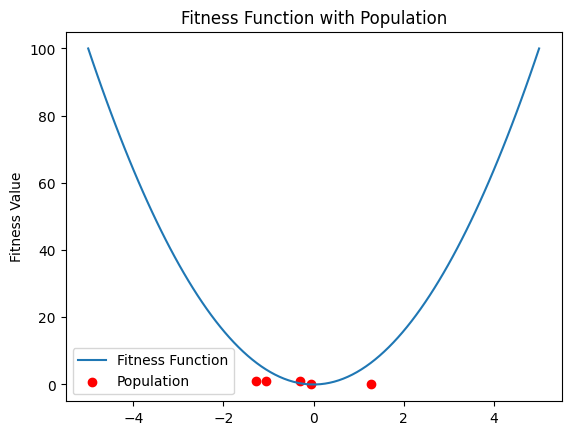

Iteration 20:
---------------
Particle 1: [Position: [-0.94  1.96  0.97 -2.22]	 Velocity: [ 0.34  0.79 -1.55 -1.52]	 Fitness: 10.57		 Personal Best: [-1.19  0.56  0.99  1.38]]
Particle 2: [Position: [-2.31  1.01 -0.03 -0.23]	 Velocity: [-1.25  0.07 -1.05 -0.26]	 Fitness: 6.40		 Personal Best: [-1.06  0.94  1.02  0.03]]
Particle 3: [Position: [-0.14  0.26  0.24 -0.09]	 Velocity: [ 0.16 -0.74  0.25  0.15]	 Fitness: 0.15		 Personal Best: [-0.14  0.26  0.24 -0.09]]
Particle 4: [Position: [ 0.02 -0.37  1.18 -0.18]	 Velocity: [ 0.09 -0.47  0.4  -0.  ]	 Fitness: 1.55		 Personal Best: [-0.06  0.1   0.77 -0.17]]
Particle 5: [Position: [-0.57 -1.21  0.69  0.25]	 Velocity: [-1.85 -1.21  0.77 -0.22]	 Fitness: 2.34		 Personal Best: [ 1.27 -0.   -0.07  0.46]]


Global Best Value: [-0.14  0.26  0.24 -0.09] 		 Score: 0.15




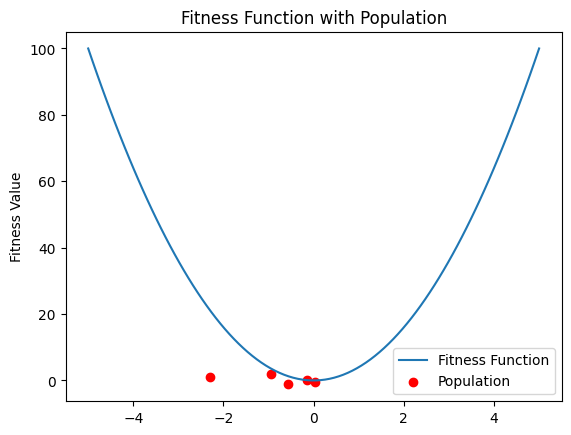

Iteration 21:
---------------
Particle 1: [Position: [-0.45  0.95 -0.83  1.09]	 Velocity: [ 0.49 -1.01 -1.8   3.31]	 Fitness: 2.98		 Personal Best: [-0.45  0.95 -0.83  1.09]]
Particle 2: [Position: [-0.1   0.89  0.81 -0.31]	 Velocity: [ 2.21 -0.12  0.84 -0.08]	 Fitness: 1.55		 Personal Best: [-0.1   0.89  0.81 -0.31]]
Particle 3: [Position: [-0.03 -0.27  0.42  0.01]	 Velocity: [ 0.11 -0.52  0.18  0.1 ]	 Fitness: 0.25		 Personal Best: [-0.14  0.26  0.24 -0.09]]
Particle 4: [Position: [ 0.01  0.03  0.55 -0.12]	 Velocity: [-0.02  0.4  -0.63  0.05]	 Fitness: 0.31		 Personal Best: [ 0.01  0.03  0.55 -0.12]]
Particle 5: [Position: [-0.99  1.2  -0.1  -0.21]	 Velocity: [-0.42  2.41 -0.8  -0.45]	 Fitness: 2.48		 Personal Best: [ 1.27 -0.   -0.07  0.46]]


Global Best Value: [-0.03 -0.27  0.42  0.01] 		 Score: 0.25




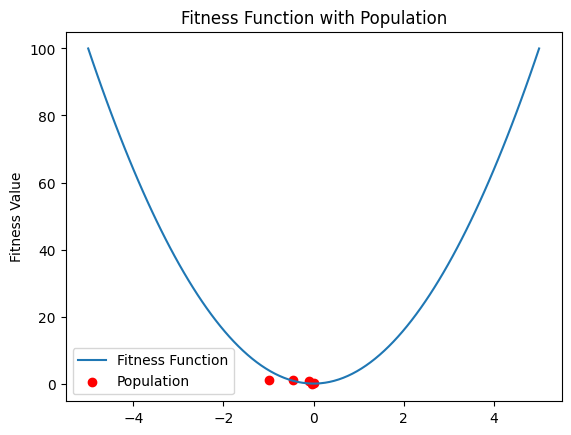

Iteration 22:
---------------
Particle 1: [Position: [-0.09  0.08 -1.6   1.96]	 Velocity: [ 0.36 -0.87 -0.76  0.87]	 Fitness: 6.42		 Personal Best: [-0.45  0.95 -0.83  1.09]]
Particle 2: [Position: [1.5  0.4  0.97 0.04]	 Velocity: [ 1.6  -0.49  0.16  0.35]	 Fitness: 3.35		 Personal Best: [-0.1   0.89  0.81 -0.31]]
Particle 3: [Position: [0.02 0.07 0.29 0.08]	 Velocity: [ 0.05  0.34 -0.12  0.07]	 Fitness: 0.10		 Personal Best: [0.02 0.07 0.29 0.08]]
Particle 4: [Position: [-0.03  0.24 -0.07 -0.02]	 Velocity: [-0.04  0.21 -0.62  0.11]	 Fitness: 0.07		 Personal Best: [-0.03  0.24 -0.07 -0.02]]
Particle 5: [Position: [ 2.32  2.   -0.41  0.47]	 Velocity: [ 3.32  0.8  -0.31  0.68]	 Fitness: 9.78		 Personal Best: [ 1.27 -0.   -0.07  0.46]]


Global Best Value: [-0.03  0.24 -0.07 -0.02] 		 Score: 0.07




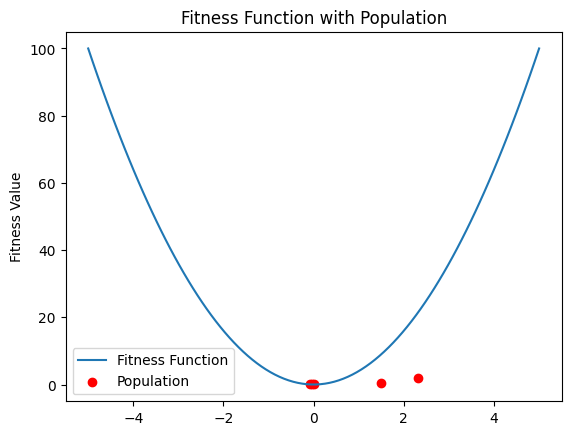

Iteration 23:
---------------
Particle 1: [Position: [-0.2  -0.29  0.47 -0.58]	 Velocity: [-0.11 -0.37  2.06 -2.54]	 Fitness: 0.67		 Personal Best: [-0.2  -0.29  0.47 -0.58]]
Particle 2: [Position: [-0.84  0.44  0.32 -0.18]	 Velocity: [-2.34  0.05 -0.65 -0.22]	 Fitness: 1.04		 Personal Best: [-0.84  0.44  0.32 -0.18]]
Particle 3: [Position: [ 0.03  0.33 -0.01  0.03]	 Velocity: [ 0.01  0.25 -0.3  -0.06]	 Fitness: 0.11		 Personal Best: [0.02 0.07 0.29 0.08]]
Particle 4: [Position: [-0.06  0.39 -0.51  0.06]	 Velocity: [-0.03  0.15 -0.43  0.07]	 Fitness: 0.42		 Personal Best: [-0.03  0.24 -0.07 -0.02]]
Particle 5: [Position: [ 1.62 -0.17 -0.21  0.29]	 Velocity: [-0.71 -2.17  0.2  -0.18]	 Fitness: 2.77		 Personal Best: [ 1.27 -0.   -0.07  0.46]]


Global Best Value: [ 0.03  0.33 -0.01  0.03] 		 Score: 0.11




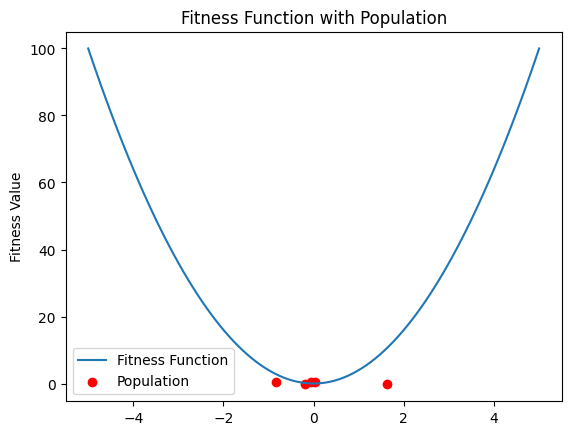

Iteration 24:
---------------
Particle 1: [Position: [-0.07 -0.02  1.73 -2.25]	 Velocity: [ 0.13  0.27  1.26 -1.68]	 Fitness: 8.07		 Personal Best: [-0.2  -0.29  0.47 -0.58]]
Particle 2: [Position: [-2.07  0.47 -0.24 -0.28]	 Velocity: [-1.22  0.03 -0.55 -0.09]	 Fitness: 4.63		 Personal Best: [-0.84  0.44  0.32 -0.18]]
Particle 3: [Position: [ 0.04  0.3  -0.1   0.03]	 Velocity: [ 0.   -0.03 -0.1   0.  ]	 Fitness: 0.10		 Personal Best: [0.02 0.07 0.29 0.08]]
Particle 4: [Position: [-0.04  0.33 -0.1   0.01]	 Velocity: [ 0.02 -0.06  0.4  -0.05]	 Fitness: 0.12		 Personal Best: [-0.03  0.24 -0.07 -0.02]]
Particle 5: [Position: [-0.11 -1.37  0.11  0.17]	 Velocity: [-1.73 -1.19  0.32 -0.12]	 Fitness: 1.92		 Personal Best: [ 1.27 -0.   -0.07  0.46]]


Global Best Value: [ 0.04  0.3  -0.1   0.03] 		 Score: 0.10




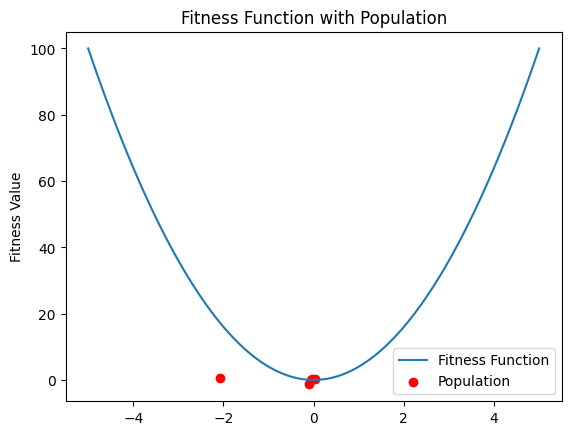

Iteration 25:
---------------
Particle 1: [Position: [ 0.1  -0.04  0.45 -0.6 ]	 Velocity: [ 0.17 -0.02 -1.28  1.66]	 Fitness: 0.57		 Personal Best: [ 0.1  -0.04  0.45 -0.6 ]]
Particle 2: [Position: [-0.53  0.22 -0.38  0.14]	 Velocity: [ 1.53 -0.25 -0.14  0.41]	 Fitness: 0.50		 Personal Best: [-0.53  0.22 -0.38  0.14]]
Particle 3: [Position: [0.03 0.07 0.16 0.06]	 Velocity: [-0.01 -0.23  0.27  0.03]	 Fitness: 0.04		 Personal Best: [0.03 0.07 0.16 0.06]]
Particle 4: [Position: [-0.01  0.24  0.21 -0.02]	 Velocity: [ 0.03 -0.09  0.31 -0.03]	 Fitness: 0.10		 Personal Best: [-0.03  0.24 -0.07 -0.02]]
Particle 5: [Position: [-1.15 -1.45 -0.01 -0.05]	 Velocity: [-1.04 -0.08 -0.12 -0.22]	 Fitness: 3.42		 Personal Best: [ 1.27 -0.   -0.07  0.46]]


Global Best Value: [0.03 0.07 0.16 0.06] 		 Score: 0.04




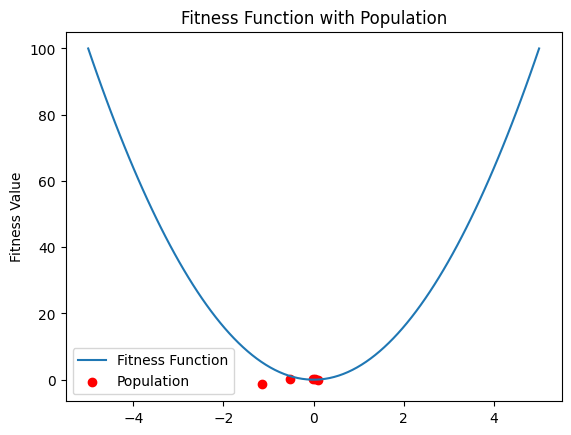

Iteration 26:
---------------
Particle 1: [Position: [ 0.14 -0.02 -0.77  0.77]	 Velocity: [ 0.04  0.01 -1.23  1.37]	 Fitness: 1.22		 Personal Best: [ 0.1  -0.04  0.45 -0.6 ]]
Particle 2: [Position: [ 0.64 -0.02 -0.21  0.37]	 Velocity: [ 1.17 -0.24  0.16  0.23]	 Fitness: 0.58		 Personal Best: [-0.53  0.22 -0.38  0.14]]
Particle 3: [Position: [ 0.02 -0.08  0.35  0.09]	 Velocity: [-0.01 -0.16  0.19  0.02]	 Fitness: 0.14		 Personal Best: [0.03 0.07 0.16 0.06]]
Particle 4: [Position: [0.04 0.17 0.27 0.07]	 Velocity: [ 0.05 -0.07  0.06  0.09]	 Fitness: 0.11		 Personal Best: [-0.03  0.24 -0.07 -0.02]]
Particle 5: [Position: [-0.24 -1.02 -0.07  0.53]	 Velocity: [ 0.92  0.42 -0.06  0.58]	 Fitness: 1.39		 Personal Best: [-0.24 -1.02 -0.07  0.53]]


Global Best Value: [0.04 0.17 0.27 0.07] 		 Score: 0.11




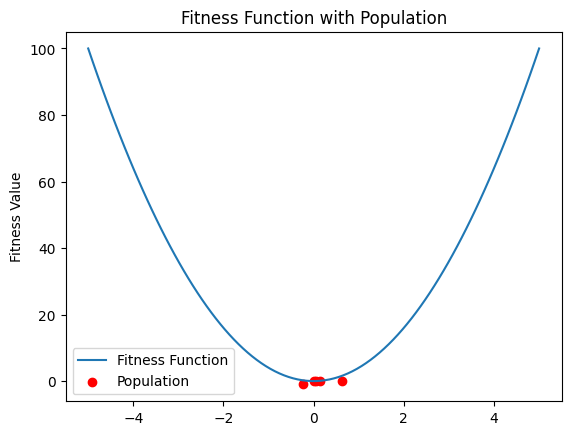

Iteration 27:
---------------
Particle 1: [Position: [ 0.12  0.2  -1.03  0.84]	 Velocity: [-0.02  0.23 -0.25  0.07]	 Fitness: 1.82		 Personal Best: [ 0.1  -0.04  0.45 -0.6 ]]
Particle 2: [Position: [0.33 0.25 0.05 0.03]	 Velocity: [-0.3   0.27  0.26 -0.33]	 Fitness: 0.18		 Personal Best: [0.33 0.25 0.05 0.03]]
Particle 3: [Position: [ 0.04 -0.11  0.43  0.09]	 Velocity: [ 0.02 -0.03  0.08 -0.  ]	 Fitness: 0.21		 Personal Best: [0.03 0.07 0.16 0.06]]
Particle 4: [Position: [0.02 0.16 0.1  0.12]	 Velocity: [-0.02 -0.01 -0.17  0.04]	 Fitness: 0.05		 Personal Best: [0.02 0.16 0.1  0.12]]
Particle 5: [Position: [0.44 0.81 0.15 0.69]	 Velocity: [0.67 1.83 0.23 0.15]	 Fitness: 1.34		 Personal Best: [0.44 0.81 0.15 0.69]]


Global Best Value: [0.02 0.16 0.1  0.12] 		 Score: 0.05




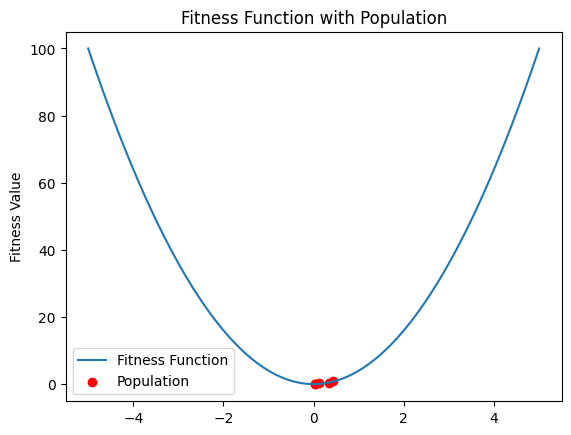

Iteration 28:
---------------
Particle 1: [Position: [ 0.06  0.02  0.45 -0.09]	 Velocity: [-0.06 -0.18  1.47 -0.93]	 Fitness: 0.21		 Personal Best: [ 0.06  0.02  0.45 -0.09]]
Particle 2: [Position: [-0.3   0.32  0.27 -0.09]	 Velocity: [-0.64  0.07  0.22 -0.13]	 Fitness: 0.28		 Personal Best: [0.33 0.25 0.05 0.03]]
Particle 3: [Position: [ 0.04  0.37 -0.01  0.07]	 Velocity: [-0.    0.48 -0.44 -0.01]	 Fitness: 0.14		 Personal Best: [0.03 0.07 0.16 0.06]]
Particle 4: [Position: [ 0.01  0.16 -0.02  0.15]	 Velocity: [-0.01 -0.   -0.12  0.03]	 Fitness: 0.05		 Personal Best: [ 0.01  0.16 -0.02  0.15]]
Particle 5: [Position: [0.34 1.44 0.31 0.31]	 Velocity: [-0.1   0.63  0.16 -0.38]	 Fitness: 2.38		 Personal Best: [0.44 0.81 0.15 0.69]]


Global Best Value: [ 0.01  0.16 -0.02  0.15] 		 Score: 0.05




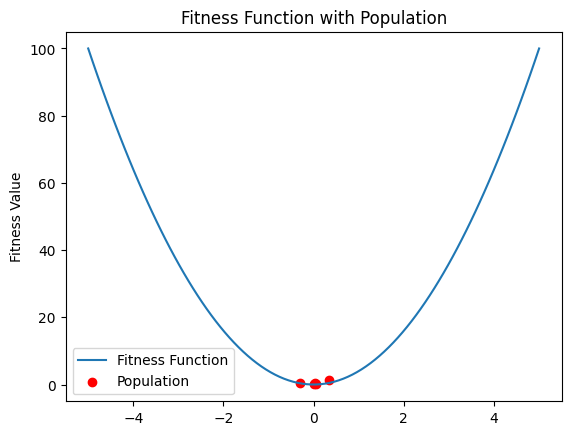

Iteration 29:
---------------
Particle 1: [Position: [-0.04 -0.05  1.37 -0.73]	 Velocity: [-0.1  -0.07  0.93 -0.63]	 Fitness: 2.41		 Personal Best: [ 0.06  0.02  0.45 -0.09]]
Particle 2: [Position: [-0.11  0.2  -0.14  0.26]	 Velocity: [ 0.19 -0.12 -0.41  0.35]	 Fitness: 0.14		 Personal Best: [-0.11  0.2  -0.14  0.26]]
Particle 3: [Position: [ 0.02  0.54 -0.11  0.06]	 Velocity: [-0.01  0.17 -0.1  -0.01]	 Fitness: 0.31		 Personal Best: [0.03 0.07 0.16 0.06]]
Particle 4: [Position: [-0.    0.15 -0.11  0.17]	 Velocity: [-0.01 -0.   -0.08  0.02]	 Fitness: 0.06		 Personal Best: [ 0.01  0.16 -0.02  0.15]]
Particle 5: [Position: [-0.12 -0.14 -0.25  0.17]	 Velocity: [-0.46 -1.58 -0.56 -0.14]	 Fitness: 0.12		 Personal Best: [-0.12 -0.14 -0.25  0.17]]


Global Best Value: [-0.    0.15 -0.11  0.17] 		 Score: 0.06




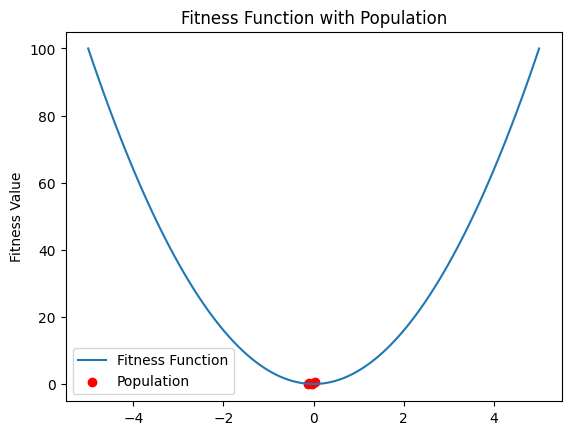

Iteration 30:
---------------
Particle 1: [Position: [-0.02  0.25  0.52 -0.17]	 Velocity: [ 0.03  0.29 -0.85  0.56]	 Fitness: 0.36		 Personal Best: [ 0.06  0.02  0.45 -0.09]]
Particle 2: [Position: [ 0.05  0.09 -0.39  0.38]	 Velocity: [ 0.16 -0.11 -0.25  0.12]	 Fitness: 0.31		 Personal Best: [-0.11  0.2  -0.14  0.26]]
Particle 3: [Position: [-0.01  0.32  0.2   0.14]	 Velocity: [-0.03 -0.22  0.31  0.07]	 Fitness: 0.16		 Personal Best: [0.03 0.07 0.16 0.06]]
Particle 4: [Position: [-0.    0.15 -0.14  0.18]	 Velocity: [ 0.   -0.   -0.04  0.01]	 Fitness: 0.08		 Personal Best: [ 0.01  0.16 -0.02  0.15]]
Particle 5: [Position: [-0.33 -1.17 -0.58  0.07]	 Velocity: [-0.21 -1.03 -0.33 -0.1 ]	 Fitness: 1.81		 Personal Best: [-0.12 -0.14 -0.25  0.17]]


Global Best Value: [-0.    0.15 -0.14  0.18] 		 Score: 0.08




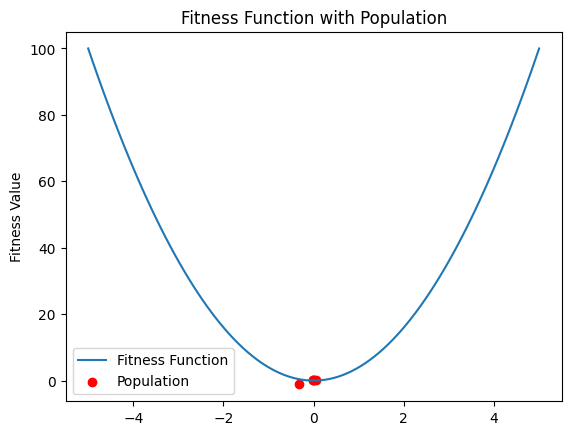

Iteration 31:
---------------
Particle 1: [Position: [ 0.05 -0.   -0.45  0.5 ]	 Velocity: [ 0.06 -0.25 -0.97  0.67]	 Fitness: 0.46		 Personal Best: [ 0.06  0.02  0.45 -0.09]]
Particle 2: [Position: [ 0.11  0.17 -0.34  0.07]	 Velocity: [ 0.06  0.08  0.04 -0.31]	 Fitness: 0.16		 Personal Best: [-0.11  0.2  -0.14  0.26]]
Particle 3: [Position: [-0.   -0.11  0.36  0.12]	 Velocity: [ 0.01 -0.44  0.17 -0.01]	 Fitness: 0.16		 Personal Best: [0.03 0.07 0.16 0.06]]
Particle 4: [Position: [ 0.    0.15 -0.05  0.14]	 Velocity: [ 0.    0.    0.09 -0.04]	 Fitness: 0.05		 Personal Best: [ 0.    0.15 -0.05  0.14]]
Particle 5: [Position: [-0.16  0.5  -0.34  0.19]	 Velocity: [0.17 1.67 0.24 0.12]	 Fitness: 0.43		 Personal Best: [-0.12 -0.14 -0.25  0.17]]


Global Best Value: [ 0.    0.15 -0.05  0.14] 		 Score: 0.05




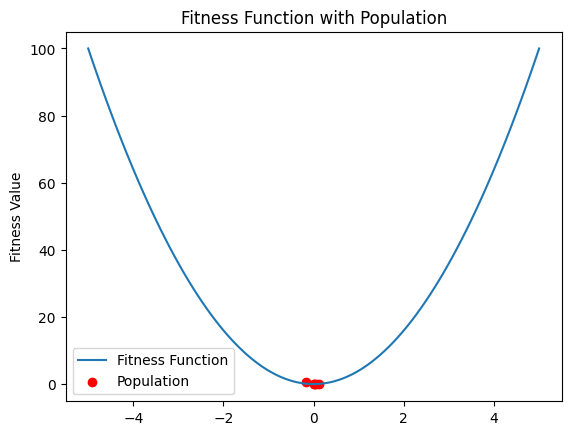

Iteration 32:
---------------
Particle 1: [Position: [ 0.09 -0.02 -0.58  0.4 ]	 Velocity: [ 0.04 -0.02 -0.13 -0.1 ]	 Fitness: 0.50		 Personal Best: [ 0.06  0.02  0.45 -0.09]]
Particle 2: [Position: [-0.19  0.23 -0.01  0.13]	 Velocity: [-0.31  0.06  0.33  0.05]	 Fitness: 0.11		 Personal Best: [-0.19  0.23 -0.01  0.13]]
Particle 3: [Position: [ 0.02 -0.21 -0.38  0.11]	 Velocity: [ 0.03 -0.1  -0.74 -0.02]	 Fitness: 0.20		 Personal Best: [0.03 0.07 0.16 0.06]]
Particle 4: [Position: [0.   0.15 0.01 0.12]	 Velocity: [ 0.    0.    0.06 -0.02]	 Fitness: 0.04		 Personal Best: [0.   0.15 0.01 0.12]]
Particle 5: [Position: [0.2  0.7  0.28 0.25]	 Velocity: [0.36 0.2  0.62 0.06]	 Fitness: 0.67		 Personal Best: [-0.12 -0.14 -0.25  0.17]]


Global Best Value: [0.   0.15 0.01 0.12] 		 Score: 0.04




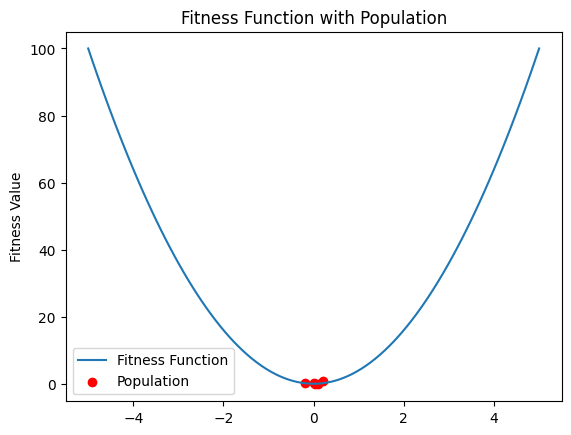

Iteration 33:
---------------
Particle 1: [Position: [ 0.07  0.02 -0.05 -0.38]	 Velocity: [-0.02  0.03  0.53 -0.78]	 Fitness: 0.15		 Personal Best: [ 0.07  0.02 -0.05 -0.38]]
Particle 2: [Position: [-0.25  0.23  0.22  0.16]	 Velocity: [-0.06  0.    0.23  0.04]	 Fitness: 0.19		 Personal Best: [-0.19  0.23 -0.01  0.13]]
Particle 3: [Position: [ 0.03  0.24 -0.05  0.06]	 Velocity: [ 0.01  0.46  0.34 -0.05]	 Fitness: 0.06		 Personal Best: [0.03 0.07 0.16 0.06]]
Particle 4: [Position: [0.01 0.16 0.05 0.1 ]	 Velocity: [ 0.    0.    0.04 -0.02]	 Fitness: 0.04		 Personal Best: [0.01 0.16 0.05 0.1 ]]
Particle 5: [Position: [ 0.11 -0.32  0.32  0.1 ]	 Velocity: [-0.09 -1.02  0.04 -0.15]	 Fitness: 0.23		 Personal Best: [-0.12 -0.14 -0.25  0.17]]


Global Best Value: [0.01 0.16 0.05 0.1 ] 		 Score: 0.04




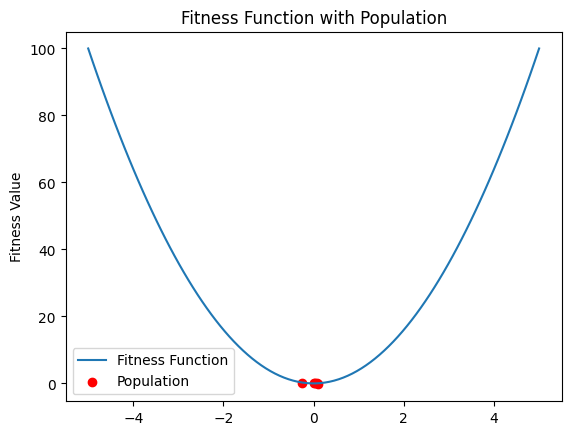

Iteration 34:
---------------
Particle 1: [Position: [-0.02  0.1   0.42 -0.21]	 Velocity: [-0.09  0.08  0.47  0.17]	 Fitness: 0.23		 Personal Best: [ 0.07  0.02 -0.05 -0.38]]
Particle 2: [Position: [0.12 0.14 0.02 0.09]	 Velocity: [ 0.37 -0.1  -0.2  -0.07]	 Fitness: 0.04		 Personal Best: [0.12 0.14 0.02 0.09]]
Particle 3: [Position: [0.01 0.22 0.49 0.04]	 Velocity: [-0.03 -0.02  0.54 -0.02]	 Fitness: 0.29		 Personal Best: [0.03 0.07 0.16 0.06]]
Particle 4: [Position: [0.01 0.16 0.09 0.09]	 Velocity: [ 0.    0.    0.03 -0.01]	 Fitness: 0.04		 Personal Best: [0.01 0.16 0.05 0.1 ]]
Particle 5: [Position: [-0.4  -0.68 -0.34  0.05]	 Velocity: [-0.5  -0.36 -0.67 -0.05]	 Fitness: 0.74		 Personal Best: [-0.12 -0.14 -0.25  0.17]]


Global Best Value: [0.01 0.16 0.09 0.09] 		 Score: 0.04




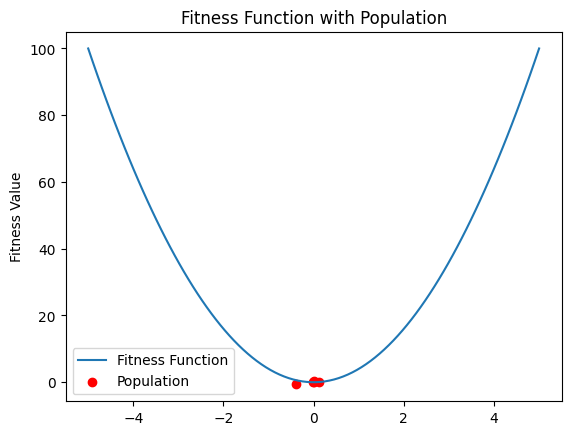

Iteration 35:
---------------
Particle 1: [Position: [-0.02  0.12  0.37 -0.02]	 Velocity: [-0.    0.03 -0.04  0.19]	 Fitness: 0.16		 Personal Best: [ 0.07  0.02 -0.05 -0.38]]
Particle 2: [Position: [ 0.36  0.09 -0.06  0.04]	 Velocity: [ 0.24 -0.04 -0.09 -0.05]	 Fitness: 0.14		 Personal Best: [0.12 0.14 0.02 0.09]]
Particle 3: [Position: [-0.01  0.01  0.15  0.08]	 Velocity: [-0.01 -0.21 -0.34  0.04]	 Fitness: 0.03		 Personal Best: [-0.01  0.01  0.15  0.08]]
Particle 4: [Position: [0.01 0.16 0.09 0.09]	 Velocity: [ 0. -0.  0. -0.]	 Fitness: 0.04		 Personal Best: [0.01 0.16 0.05 0.1 ]]
Particle 5: [Position: [-0.24  0.45 -0.38  0.12]	 Velocity: [ 0.15  1.13 -0.04  0.08]	 Fitness: 0.42		 Personal Best: [-0.12 -0.14 -0.25  0.17]]


Global Best Value: [-0.01  0.01  0.15  0.08] 		 Score: 0.03




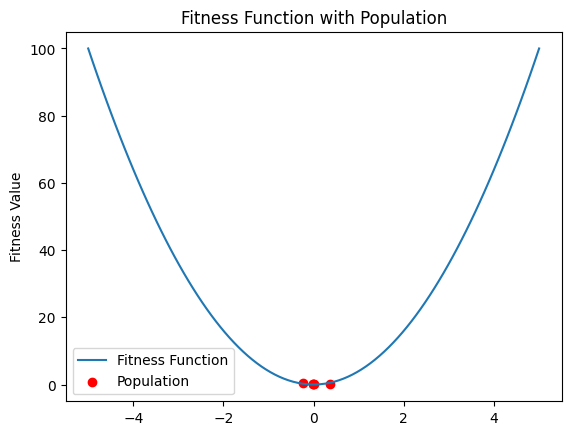

Iteration 36:
---------------
Particle 1: [Position: [ 0.   -0.15 -0.43 -0.29]	 Velocity: [ 0.03 -0.28 -0.8  -0.28]	 Fitness: 0.29		 Personal Best: [ 0.07  0.02 -0.05 -0.38]]
Particle 2: [Position: [0.06 0.07 0.07 0.08]	 Velocity: [-0.3  -0.03  0.13  0.04]	 Fitness: 0.02		 Personal Best: [0.06 0.07 0.07 0.08]]
Particle 3: [Position: [-0.02 -0.13 -0.09  0.11]	 Velocity: [-0.01 -0.14 -0.24  0.03]	 Fitness: 0.04		 Personal Best: [-0.01  0.01  0.15  0.08]]
Particle 4: [Position: [ 0.   -0.05  0.13  0.1 ]	 Velocity: [-0.01 -0.21  0.05  0.01]	 Fitness: 0.03		 Personal Best: [ 0.   -0.05  0.13  0.1 ]]
Particle 5: [Position: [ 0.14  0.52 -0.32  0.2 ]	 Velocity: [0.38 0.07 0.06 0.07]	 Fitness: 0.44		 Personal Best: [-0.12 -0.14 -0.25  0.17]]


Global Best Value: [0.06 0.07 0.07 0.08] 		 Score: 0.02




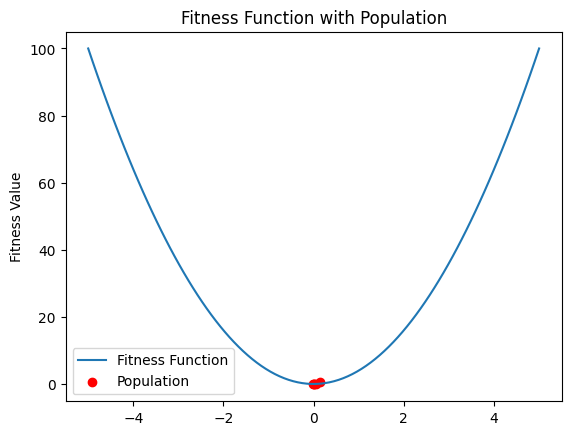

Iteration 37:
---------------
Particle 1: [Position: [ 0.07 -0.13 -0.24 -0.23]	 Velocity: [0.07 0.02 0.19 0.06]	 Fitness: 0.13		 Personal Best: [ 0.07 -0.13 -0.24 -0.23]]
Particle 2: [Position: [-0.15  0.05  0.16  0.11]	 Velocity: [-0.21 -0.02  0.09  0.03]	 Fitness: 0.06		 Personal Best: [0.06 0.07 0.07 0.08]]
Particle 3: [Position: [ 0.04 -0.03  0.12  0.1 ]	 Velocity: [ 0.06  0.1   0.21 -0.01]	 Fitness: 0.03		 Personal Best: [ 0.04 -0.03  0.12  0.1 ]]
Particle 4: [Position: [ 0.   -0.13  0.16  0.08]	 Velocity: [ 0.   -0.08  0.03 -0.02]	 Fitness: 0.05		 Personal Best: [ 0.   -0.05  0.13  0.1 ]]
Particle 5: [Position: [ 0.08 -0.47 -0.01  0.11]	 Velocity: [-0.07 -0.99  0.32 -0.09]	 Fitness: 0.24		 Personal Best: [-0.12 -0.14 -0.25  0.17]]


Global Best Value: [ 0.04 -0.03  0.12  0.1 ] 		 Score: 0.03




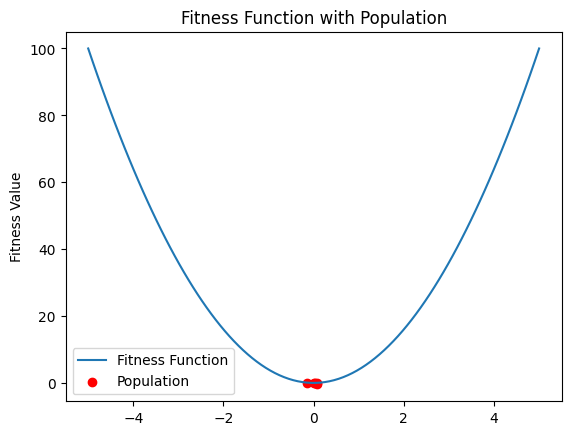

Iteration 38:
---------------
Particle 1: [Position: [ 0.08 -0.09  0.32  0.25]	 Velocity: [0.01 0.04 0.56 0.48]	 Fitness: 0.18		 Personal Best: [ 0.07 -0.13 -0.24 -0.23]]
Particle 2: [Position: [0.09 0.04 0.08 0.1 ]	 Velocity: [ 0.25 -0.01 -0.08 -0.01]	 Fitness: 0.03		 Personal Best: [0.06 0.07 0.07 0.08]]
Particle 3: [Position: [0.08 0.04 0.27 0.09]	 Velocity: [ 0.04  0.07  0.15 -0.01]	 Fitness: 0.09		 Personal Best: [ 0.04 -0.03  0.12  0.1 ]]
Particle 4: [Position: [ 0.04 -0.06  0.12  0.09]	 Velocity: [ 0.04  0.08 -0.05  0.01]	 Fitness: 0.03		 Personal Best: [ 0.04 -0.06  0.12  0.09]]
Particle 5: [Position: [-0.12 -0.59 -0.03  0.05]	 Velocity: [-0.2  -0.12 -0.02 -0.06]	 Fitness: 0.37		 Personal Best: [-0.12 -0.14 -0.25  0.17]]


Global Best Value: [0.09 0.04 0.08 0.1 ] 		 Score: 0.03




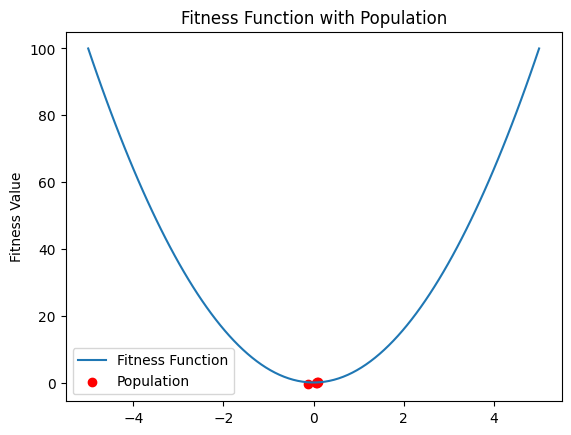

Iteration 39:
---------------
Particle 1: [Position: [ 0.08  0.03 -0.04  0.36]	 Velocity: [-0.    0.12 -0.36  0.11]	 Fitness: 0.14		 Personal Best: [ 0.07 -0.13 -0.24 -0.23]]
Particle 2: [Position: [0.25 0.04 0.02 0.08]	 Velocity: [ 0.16  0.   -0.06 -0.03]	 Fitness: 0.07		 Personal Best: [0.06 0.07 0.07 0.08]]
Particle 3: [Position: [ 0.09  0.06 -0.01  0.1 ]	 Velocity: [ 0.01  0.02 -0.27  0.01]	 Fitness: 0.02		 Personal Best: [ 0.09  0.06 -0.01  0.1 ]]
Particle 4: [Position: [0.14 0.05 0.06 0.11]	 Velocity: [ 0.1   0.1  -0.05  0.01]	 Fitness: 0.04		 Personal Best: [ 0.04 -0.06  0.12  0.09]]
Particle 5: [Position: [-0.2   0.17 -0.15  0.12]	 Velocity: [-0.07  0.76 -0.12  0.07]	 Fitness: 0.10		 Personal Best: [-0.2   0.17 -0.15  0.12]]


Global Best Value: [ 0.09  0.06 -0.01  0.1 ] 		 Score: 0.02




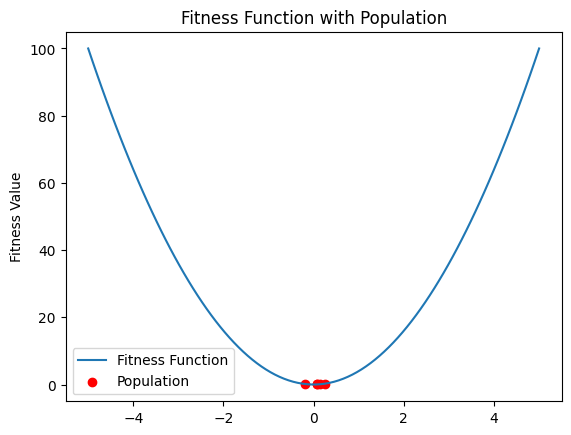

Iteration 40:
---------------
Particle 1: [Position: [ 0.07  0.05 -0.34 -0.33]	 Velocity: [-0.01  0.03 -0.3  -0.69]	 Fitness: 0.23		 Personal Best: [ 0.07 -0.13 -0.24 -0.23]]
Particle 2: [Position: [0.07 0.06 0.02 0.1 ]	 Velocity: [-0.18  0.01  0.    0.02]	 Fitness: 0.02		 Personal Best: [0.07 0.06 0.02 0.1 ]]
Particle 3: [Position: [ 0.09  0.08 -0.2   0.11]	 Velocity: [ 0.    0.02 -0.19  0.01]	 Fitness: 0.06		 Personal Best: [ 0.09  0.06 -0.01  0.1 ]]
Particle 4: [Position: [ 0.08  0.07 -0.04  0.1 ]	 Velocity: [-0.06  0.02 -0.1  -0.01]	 Fitness: 0.02		 Personal Best: [ 0.08  0.07 -0.04  0.1 ]]
Particle 5: [Position: [-0.03  0.55 -0.19  0.16]	 Velocity: [ 0.17  0.38 -0.04  0.04]	 Fitness: 0.36		 Personal Best: [-0.2   0.17 -0.15  0.12]]


Global Best Value: [0.07 0.06 0.02 0.1 ] 		 Score: 0.02




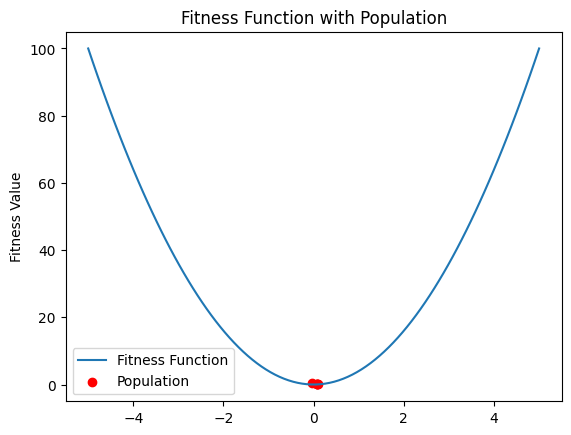

Iteration 41:
---------------
Particle 1: [Position: [ 0.07 -0.06  0.06 -0.43]	 Velocity: [-0.   -0.12  0.4  -0.1 ]	 Fitness: 0.20		 Personal Best: [ 0.07 -0.13 -0.24 -0.23]]
Particle 2: [Position: [-0.05  0.07  0.02  0.11]	 Velocity: [-0.12  0.01  0.    0.02]	 Fitness: 0.02		 Personal Best: [0.07 0.06 0.02 0.1 ]]
Particle 3: [Position: [ 0.09  0.08 -0.16  0.11]	 Velocity: [-0.    0.    0.04 -0.  ]	 Fitness: 0.05		 Personal Best: [ 0.09  0.06 -0.01  0.1 ]]
Particle 4: [Position: [ 0.03  0.07 -0.03  0.09]	 Velocity: [-0.05  0.01  0.02 -0.01]	 Fitness: 0.02		 Personal Best: [ 0.03  0.07 -0.03  0.09]]
Particle 5: [Position: [ 0.07  0.17 -0.03  0.13]	 Velocity: [ 0.1  -0.38  0.16 -0.02]	 Fitness: 0.05		 Personal Best: [ 0.07  0.17 -0.03  0.13]]


Global Best Value: [ 0.03  0.07 -0.03  0.09] 		 Score: 0.02




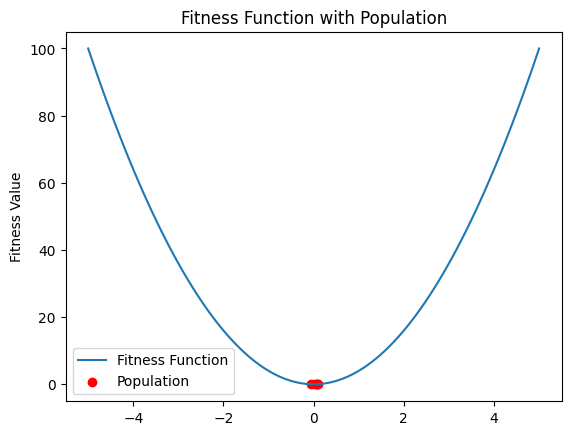

Iteration 42:
---------------
Particle 1: [Position: [ 0.04 -0.05  0.1  -0.1 ]	 Velocity: [-0.03  0.01  0.04  0.32]	 Fitness: 0.02		 Personal Best: [ 0.04 -0.05  0.1  -0.1 ]]
Particle 2: [Position: [ 0.02  0.07 -0.03  0.1 ]	 Velocity: [ 0.07  0.   -0.05 -0.01]	 Fitness: 0.02		 Personal Best: [ 0.02  0.07 -0.03  0.1 ]]
Particle 3: [Position: [0.02 0.06 0.09 0.08]	 Velocity: [-0.07 -0.02  0.25 -0.03]	 Fitness: 0.02		 Personal Best: [0.02 0.06 0.09 0.08]]
Particle 4: [Position: [-0.    0.07 -0.02  0.09]	 Velocity: [-0.03  0.    0.01 -0.  ]	 Fitness: 0.01		 Personal Best: [-0.    0.07 -0.02  0.09]]
Particle 5: [Position: [ 0.1  -0.19  0.08  0.09]	 Velocity: [ 0.02 -0.36  0.11 -0.04]	 Fitness: 0.06		 Personal Best: [ 0.07  0.17 -0.03  0.13]]


Global Best Value: [-0.    0.07 -0.02  0.09] 		 Score: 0.01




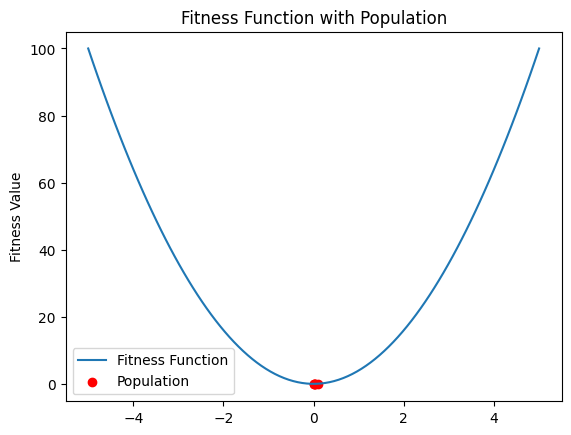

Iteration 43:
---------------
Particle 1: [Position: [-0.01  0.04  0.08  0.27]	 Velocity: [-0.05  0.09 -0.02  0.37]	 Fitness: 0.08		 Personal Best: [ 0.04 -0.05  0.1  -0.1 ]]
Particle 2: [Position: [ 0.05  0.07 -0.06  0.09]	 Velocity: [ 0.03  0.01 -0.03 -0.01]	 Fitness: 0.02		 Personal Best: [ 0.02  0.07 -0.03  0.1 ]]
Particle 3: [Position: [-0.06  0.05  0.24  0.07]	 Velocity: [-0.08 -0.    0.16 -0.01]	 Fitness: 0.07		 Personal Best: [0.02 0.06 0.09 0.08]]
Particle 4: [Position: [-0.03  0.08 -0.01  0.09]	 Velocity: [-0.02  0.    0.01 -0.  ]	 Fitness: 0.01		 Personal Best: [-0.    0.07 -0.02  0.09]]
Particle 5: [Position: [ 0.09 -0.02 -0.13  0.1 ]	 Velocity: [-0.01  0.17 -0.21  0.01]	 Fitness: 0.04		 Personal Best: [ 0.09 -0.02 -0.13  0.1 ]]


Global Best Value: [-0.03  0.08 -0.01  0.09] 		 Score: 0.01




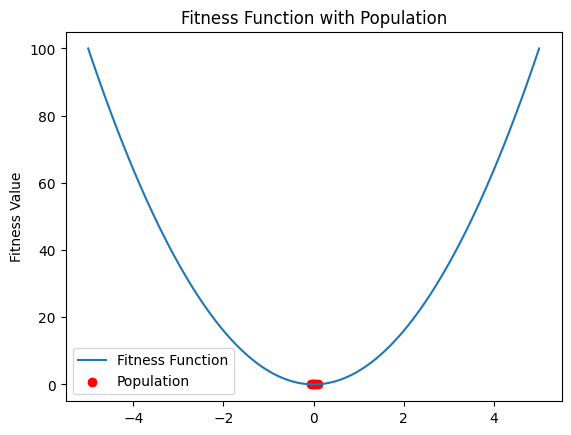

Iteration 44:
---------------
Particle 1: [Position: [-0.02  0.07  0.07  0.07]	 Velocity: [-0.01  0.03 -0.01 -0.2 ]	 Fitness: 0.02		 Personal Best: [-0.02  0.07  0.07  0.07]]
Particle 2: [Position: [ 0.06  0.07 -0.04  0.09]	 Velocity: [0.01 0.   0.01 0.  ]	 Fitness: 0.02		 Personal Best: [ 0.02  0.07 -0.03  0.1 ]]
Particle 3: [Position: [-0.03  0.07  0.16  0.08]	 Velocity: [ 0.03  0.02 -0.09  0.01]	 Fitness: 0.04		 Personal Best: [0.02 0.06 0.09 0.08]]
Particle 4: [Position: [-0.02  0.08 -0.01  0.09]	 Velocity: [ 0.  0. -0. -0.]	 Fitness: 0.01		 Personal Best: [-0.    0.07 -0.02  0.09]]
Particle 5: [Position: [-0.05  0.1  -0.13  0.1 ]	 Velocity: [-0.14  0.12  0.   -0.  ]	 Fitness: 0.04		 Personal Best: [ 0.09 -0.02 -0.13  0.1 ]]


Global Best Value: [-0.02  0.08 -0.01  0.09] 		 Score: 0.01




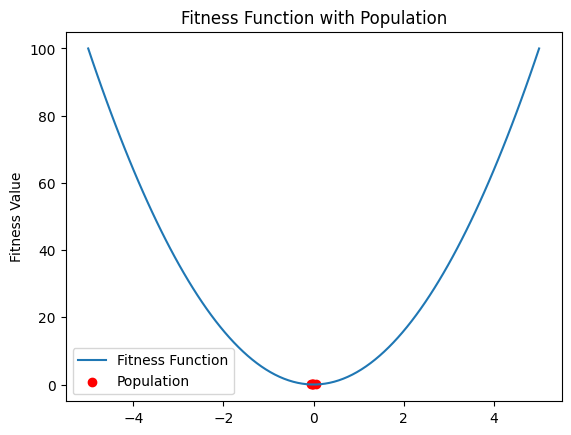

Iteration 45:
---------------
Particle 1: [Position: [-0.03  0.1   0.05 -0.06]	 Velocity: [-0.01  0.03 -0.02 -0.14]	 Fitness: 0.02		 Personal Best: [-0.02  0.07  0.07  0.07]]
Particle 2: [Position: [-0.    0.07  0.01  0.1 ]	 Velocity: [-0.06 -0.    0.06  0.01]	 Fitness: 0.02		 Personal Best: [ 0.02  0.07 -0.03  0.1 ]]
Particle 3: [Position: [ 0.05  0.09 -0.18  0.09]	 Velocity: [ 0.08  0.02 -0.34  0.02]	 Fitness: 0.05		 Personal Best: [0.02 0.06 0.09 0.08]]
Particle 4: [Position: [-0.02  0.07 -0.02  0.09]	 Velocity: [ 0. -0. -0. -0.]	 Fitness: 0.01		 Personal Best: [-0.02  0.07 -0.02  0.09]]
Particle 5: [Position: [ 0.05  0.07 -0.    0.09]	 Velocity: [ 0.1  -0.03  0.12 -0.01]	 Fitness: 0.02		 Personal Best: [ 0.05  0.07 -0.    0.09]]


Global Best Value: [-0.02  0.07 -0.02  0.09] 		 Score: 0.01




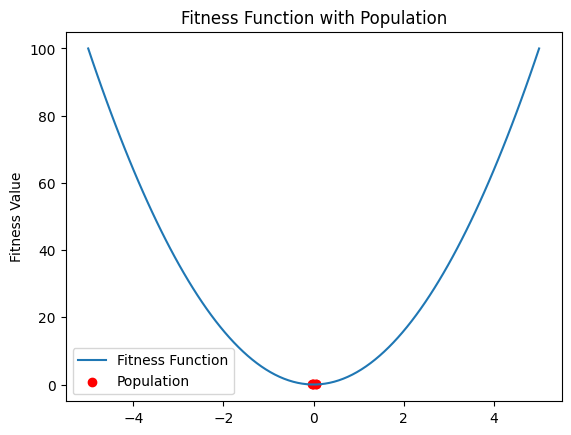

Iteration 46:
---------------
Particle 1: [Position: [-0.03  0.09  0.02  0.19]	 Velocity: [ 0.01 -0.01 -0.03  0.25]	 Fitness: 0.04		 Personal Best: [-0.02  0.07  0.07  0.07]]
Particle 2: [Position: [-0.04  0.07  0.03  0.09]	 Velocity: [-0.03 -0.01  0.02 -0.01]	 Fitness: 0.02		 Personal Best: [-0.04  0.07  0.03  0.09]]
Particle 3: [Position: [-0.    0.08 -0.35  0.09]	 Velocity: [-0.05 -0.01 -0.17 -0.  ]	 Fitness: 0.14		 Personal Best: [0.02 0.06 0.09 0.08]]
Particle 4: [Position: [-0.02  0.07 -0.02  0.08]	 Velocity: [ 0. -0. -0. -0.]	 Fitness: 0.01		 Personal Best: [-0.02  0.07 -0.02  0.08]]
Particle 5: [Position: [0.07 0.05 0.07 0.08]	 Velocity: [ 0.02 -0.02  0.07 -0.02]	 Fitness: 0.02		 Personal Best: [ 0.05  0.07 -0.    0.09]]


Global Best Value: [-0.02  0.07 -0.02  0.08] 		 Score: 0.01




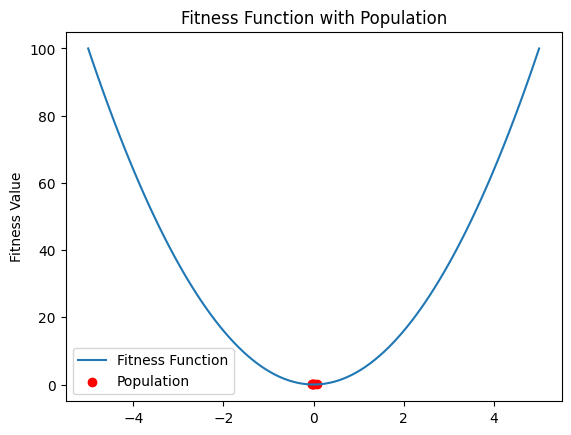

Iteration 47:
---------------
Particle 1: [Position: [-0.01  0.05 -0.    0.3 ]	 Velocity: [ 0.01 -0.04 -0.02  0.11]	 Fitness: 0.09		 Personal Best: [-0.02  0.07  0.07  0.07]]
Particle 2: [Position: [-0.05  0.07  0.04  0.08]	 Velocity: [-0.02 -0.    0.01 -0.01]	 Fitness: 0.01		 Personal Best: [-0.05  0.07  0.04  0.08]]
Particle 3: [Position: [-0.06  0.03  0.07  0.08]	 Velocity: [-0.06 -0.05  0.41 -0.01]	 Fitness: 0.02		 Personal Best: [-0.06  0.03  0.07  0.08]]
Particle 4: [Position: [-0.02  0.07 -0.02  0.08]	 Velocity: [ 0. -0. -0. -0.]	 Fitness: 0.01		 Personal Best: [-0.02  0.07 -0.02  0.08]]
Particle 5: [Position: [-0.02  0.08  0.07  0.09]	 Velocity: [-0.09  0.03  0.    0.02]	 Fitness: 0.02		 Personal Best: [ 0.05  0.07 -0.    0.09]]


Global Best Value: [-0.02  0.07 -0.02  0.08] 		 Score: 0.01




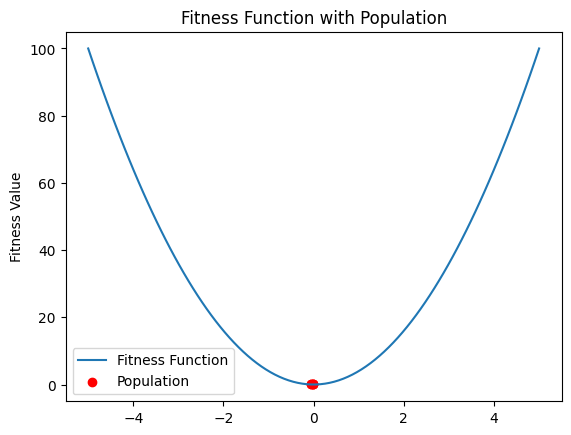

Iteration 48:
---------------
Particle 1: [Position: [-0.01  0.06  0.03  0.09]	 Velocity: [ 0.    0.01  0.03 -0.21]	 Fitness: 0.01		 Personal Best: [-0.01  0.06  0.03  0.09]]
Particle 2: [Position: [-0.04  0.07  0.01  0.07]	 Velocity: [ 0.02  0.   -0.03 -0.01]	 Fitness: 0.01		 Personal Best: [-0.04  0.07  0.01  0.07]]
Particle 3: [Position: [-0.08  0.01  0.25  0.08]	 Velocity: [-0.03 -0.02  0.18 -0.01]	 Fitness: 0.07		 Personal Best: [-0.06  0.03  0.07  0.08]]
Particle 4: [Position: [-0.02  0.07 -0.02  0.08]	 Velocity: [ 0. -0. -0. -0.]	 Fitness: 0.01		 Personal Best: [-0.02  0.07 -0.02  0.08]]
Particle 5: [Position: [-0.02  0.08 -0.05  0.09]	 Velocity: [-0.   -0.   -0.12 -0.  ]	 Fitness: 0.02		 Personal Best: [ 0.05  0.07 -0.    0.09]]


Global Best Value: [-0.04  0.07  0.01  0.07] 		 Score: 0.01




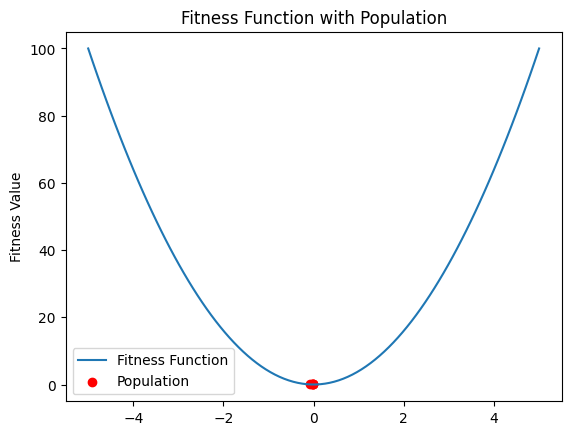

Iteration 49:
---------------
Particle 1: [Position: [-0.03  0.08  0.04 -0.07]	 Velocity: [-0.02  0.02  0.01 -0.16]	 Fitness: 0.01		 Personal Best: [-0.01  0.06  0.03  0.09]]
Particle 2: [Position: [-0.03  0.07 -0.01  0.07]	 Velocity: [ 0.01  0.   -0.02 -0.  ]	 Fitness: 0.01		 Personal Best: [-0.03  0.07 -0.01  0.07]]
Particle 3: [Position: [-0.03  0.11  0.23  0.08]	 Velocity: [ 0.06  0.1  -0.01 -0.  ]	 Fitness: 0.07		 Personal Best: [-0.06  0.03  0.07  0.08]]
Particle 4: [Position: [-0.03  0.07  0.    0.08]	 Velocity: [-0.02 -0.    0.03 -0.  ]	 Fitness: 0.01		 Personal Best: [-0.03  0.07  0.    0.08]]
Particle 5: [Position: [-0.03  0.07 -0.06  0.09]	 Velocity: [-0.   -0.01 -0.01 -0.01]	 Fitness: 0.02		 Personal Best: [ 0.05  0.07 -0.    0.09]]


Global Best Value: [-0.03  0.07 -0.01  0.07] 		 Score: 0.01




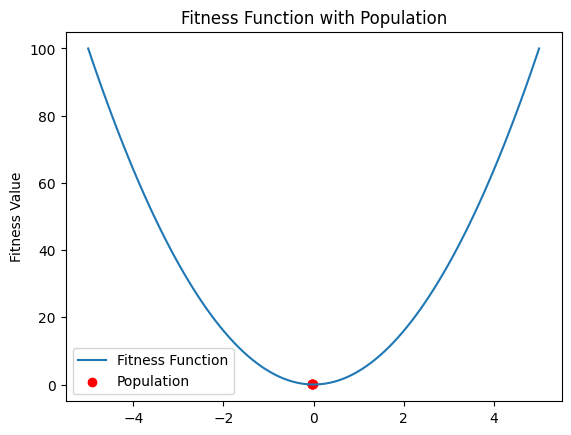

Iteration 50:
---------------
Particle 1: [Position: [-0.04  0.06  0.01  0.09]	 Velocity: [-0.01 -0.02 -0.03  0.16]	 Fitness: 0.01		 Personal Best: [-0.01  0.06  0.03  0.09]]
Particle 2: [Position: [-0.02  0.07 -0.03  0.07]	 Velocity: [ 0.01  0.   -0.01 -0.  ]	 Fitness: 0.01		 Personal Best: [-0.02  0.07 -0.03  0.07]]
Particle 3: [Position: [ 0.01  0.06 -0.11  0.08]	 Velocity: [ 0.04 -0.05 -0.34  0.  ]	 Fitness: 0.02		 Personal Best: [-0.06  0.03  0.07  0.08]]
Particle 4: [Position: [-0.04  0.07  0.01  0.07]	 Velocity: [-0.01 -0.    0.   -0.01]	 Fitness: 0.01		 Personal Best: [-0.04  0.07  0.01  0.07]]
Particle 5: [Position: [0.01 0.06 0.01 0.07]	 Velocity: [ 0.04 -0.01  0.07 -0.01]	 Fitness: 0.01		 Personal Best: [0.01 0.06 0.01 0.07]]


Global Best Value: [0.01 0.06 0.01 0.07] 		 Score: 0.01




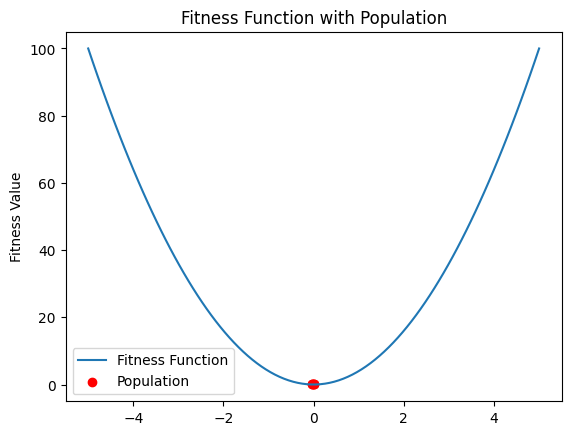

[$] Mission accomplished! Threshold fitness value reached 🎉🚀


In [11]:
if __name__ == "__main__":
    main()


*The **decreasing score** across iterations reflects progress towards **minimizing** the objective function, which is aligned with our optimization goal.*

#7 - Conclusion

In this notebook, we implemented the PSO algorithm to solve an optimization problem efficiently. PSO is a powerful metaheuristic technique that can be applied to a wide range of optimization problems.